In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

pd.options.display.max_rows = 999

#for skew visualization
import scipy.stats as stat
import pylab
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
life_filled=pd.read_csv("dataset/life_filled.csv")
life_filled.drop(columns=life_filled.columns[0],axis=1,inplace=True)
print("Data dimensions",life_filled.shape)
life_filled.head()

Data dimensions (2938, 21)


COUNTRY      STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0  Afghanistan  Developing  2015.0             65.0             26.3   
1  Afghanistan  Developing  2014.0             59.9             27.1   
2  Afghanistan  Developing  2013.0             59.9             26.8   
3  Afghanistan  Developing  2012.0             59.5             27.2   
4  Afghanistan  Developing  2011.0             59.2             27.5   

   INFANT_DEATHS  ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B  MEASLES  ...  \
0            6.2     0.01               71.279624         65.0    115.4  ...   
1            6.4     0.01               73.523582         62.0     49.2  ...   
2            6.6     0.01               73.219243         64.0     43.0  ...   
3            6.9     0.01               78.184215         67.0    278.7  ...   
4            7.1     0.01                7.097109         68.0    301.3  ...   

   UNDER_FIVE_DEATHS  POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  HIV/AIDS  \
0                8.3    6.0               8.16        65.0      0.01   
1                8.6   58.0               8.18        62.0      0.01   
2                8.9   62.0               8.13        64.0      0.01   
3                9.3   67.0               8.52        67.0      0.01   
4                9.7   68.0               7.87        68.0      0.01   

          GDP  POPULATION  THINNESS_5_to_19_YEARS  \
0  584.259210  33736494.0                    34.5   
1  612.696514    327582.0                    35.0   
2  631.744976  31731688.0                    35.4   
3  669.959000   3696958.0                    35.9   
4   63.537231   2978599.0                    36.4   

   INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [3]:
life_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   object 
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

# Skew correction and outlier treatment

In [4]:
life_filled.skew()

C:\Users\TdrDi\AppData\Local\Temp\ipykernel_16876\369415656.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_filled.skew()


YEAR                              -0.006409
LIFE_EXPECTANCY                   -0.637003
ADULT_MORTALITY                    1.163749
INFANT_DEATHS                      2.556523
ALCOHOL                            1.960886
PERCENTAGE_EXPENDITURE             1.603258
HEPATITIS_B                       -1.137805
MEASLES                            9.441332
BMI                               -0.128950
UNDER_FIVE_DEATHS                  2.647120
POLIO                             -2.056882
TOTAL_EXPENDITURE                  2.048447
DIPHTHERIA                        -2.033058
HIV/AIDS                           5.396112
GDP                                1.712522
POPULATION                         2.694467
THINNESS_5_to_19_YEARS             1.687711
INCOME_COMPOSITION_OF_RESOURCES   -1.176023
SCHOOLING                         -0.207967
dtype: float64

we will be exploring a few types of skew correction transformations for left and right skew and seeing which ones give us the best result. **Goal is to make every feature as close to gaussian distribution as possible**

*We are only considersing features with skewness higher than 0.5 as positively skewed and those with skewness with lower than 0.5 as negatively skewed. The rest are considered normally distributed.*

#### This new transformed dataframe will be called life_tranform

In [5]:
life_transform=life_filled.copy()
temp_df=life_transform.select_dtypes(exclude='object')
left_skew=[]
right_skew=[]
for var in temp_df.columns:
    if temp_df[var].skew() > 0.5:
        right_skew.append(var)
    elif temp_df[var].skew() < -0.5:
        left_skew.append(var)

In [6]:
left_skew

['LIFE_EXPECTANCY',
 'HEPATITIS_B',
 'POLIO',
 'DIPHTHERIA',
 'INCOME_COMPOSITION_OF_RESOURCES']

In [7]:
right_skew

['ADULT_MORTALITY',
 'INFANT_DEATHS',
 'ALCOHOL',
 'PERCENTAGE_EXPENDITURE',
 'MEASLES',
 'UNDER_FIVE_DEATHS',
 'TOTAL_EXPENDITURE',
 'HIV/AIDS',
 'GDP',
 'POPULATION',
 'THINNESS_5_to_19_YEARS']

In [8]:
#function to plot out and visualize the skewness
def plot_skew(dataframe, feature):
    f,axes=plt.subplots(1,2,figsize=(10,6))
    sb.histplot(data=dataframe[feature],ax=axes[0],kde=True)
    stat.probplot(dataframe[feature],dist='norm',plot=pylab)
    print("SKEW AFTER TRANSFORMATION:",dataframe[feature].skew())
    plt.show()

the closer the datapoints are on the straight line on the probability plot, the closer it is to a normal/gaussian distribution, so we will try to achieve that. Probplot gives a very easy way to visualise the skew

## For left skew
we will try the following transformations:
- square
- exponential transformation
- yeojohnson transformation using scikit learn power transformer
- quantile transformation using scikit learn quantile transformer

### Square

LIFE_EXPECTANCY
SKEW BEFORE SQUARE TRANSFORMATION: -0.6370026735578247
SKEW AFTER TRANSFORMATION: -0.3437760950445888


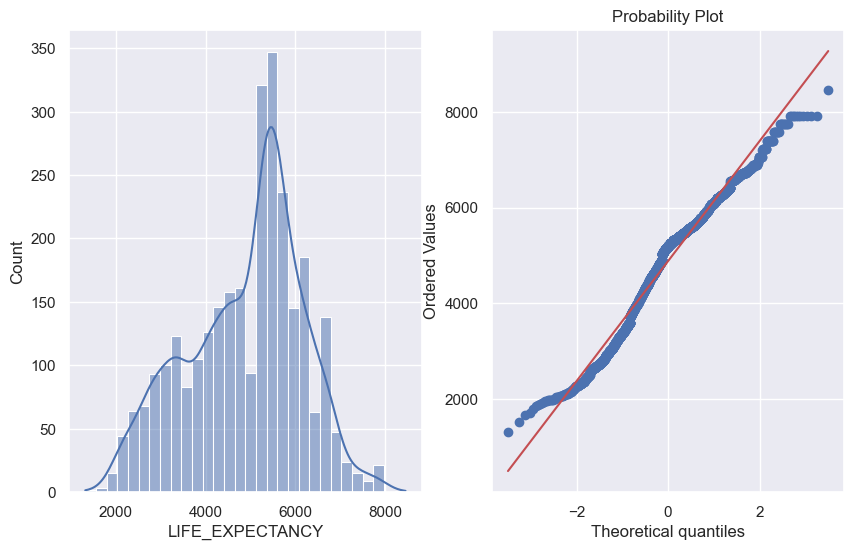

HEPATITIS_B
SKEW BEFORE SQUARE TRANSFORMATION: -1.137805052112449
SKEW AFTER TRANSFORMATION: -0.5622213243077308


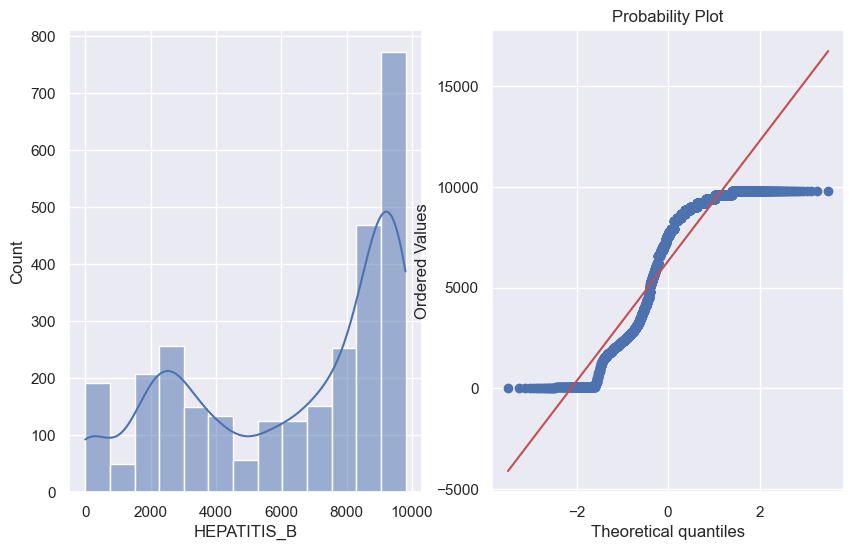

POLIO
SKEW BEFORE SQUARE TRANSFORMATION: -2.0568824701002297
SKEW AFTER TRANSFORMATION: -1.3163208923044285


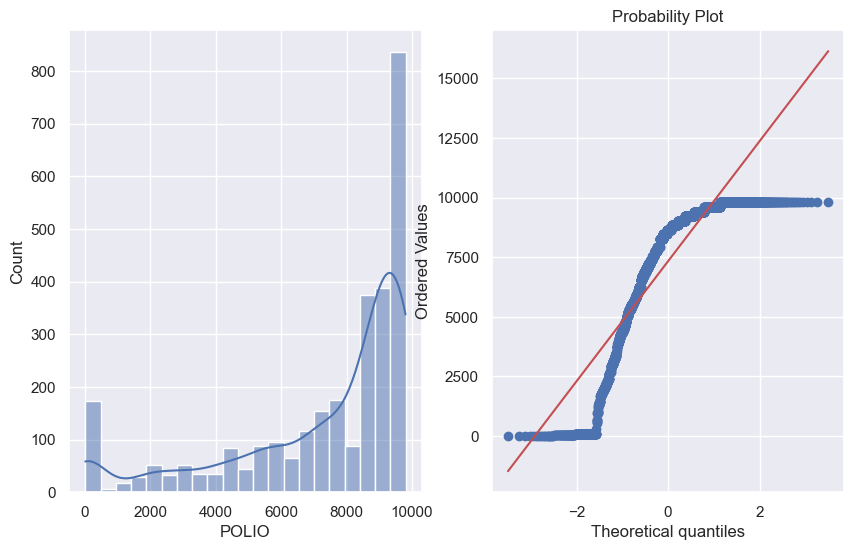

DIPHTHERIA
SKEW BEFORE SQUARE TRANSFORMATION: -2.033057535286581
SKEW AFTER TRANSFORMATION: -1.3332808583348024


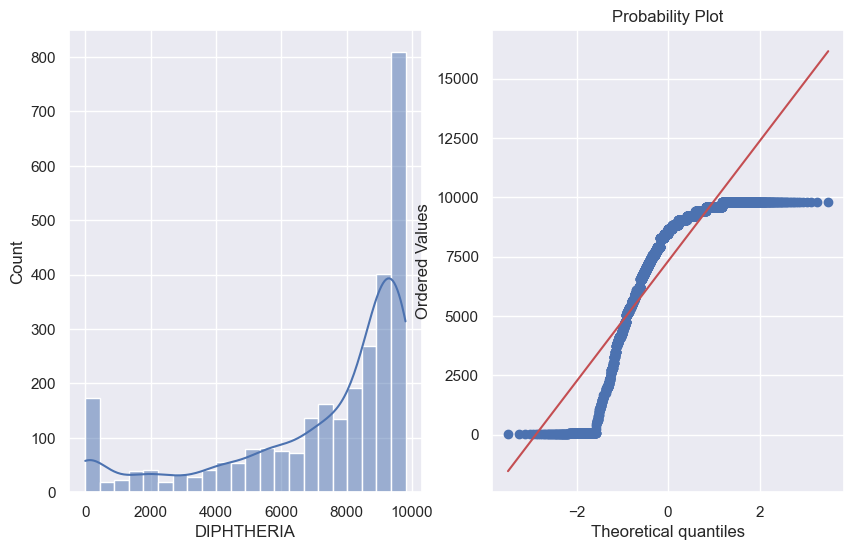

INCOME_COMPOSITION_OF_RESOURCES
SKEW BEFORE SQUARE TRANSFORMATION: -1.1760227590112124
SKEW AFTER TRANSFORMATION: -0.0962735932028975


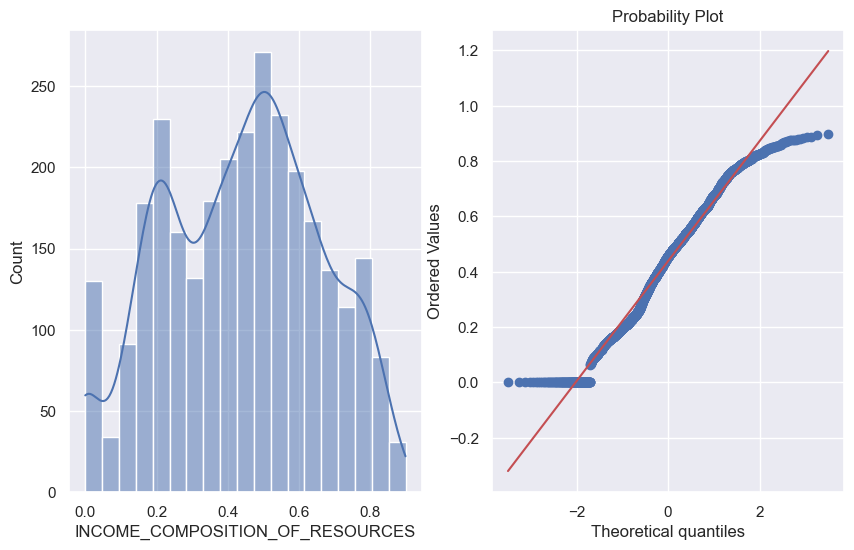

In [9]:
#square
for var in left_skew:
    print(var)
    print("SKEW BEFORE SQUARE TRANSFORMATION:",life_transform[var].skew())
    temp_df=pd.DataFrame(np.power(life_transform[var],2))
    plot_skew(temp_df,var)

### Exponential

LIFE_EXPECTANCY
SKEW BEFORE EXPONENTIAL TRANSFORMATION: -0.6370026735578247
SKEW AFTER TRANSFORMATION: -0.6872809214890435


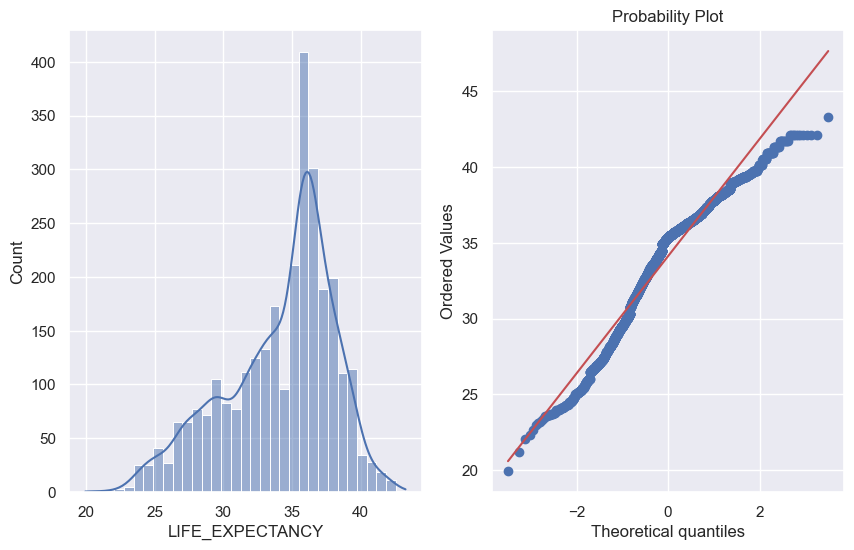

HEPATITIS_B
SKEW BEFORE EXPONENTIAL TRANSFORMATION: -1.137805052112449
SKEW AFTER TRANSFORMATION: -1.3114319681937072


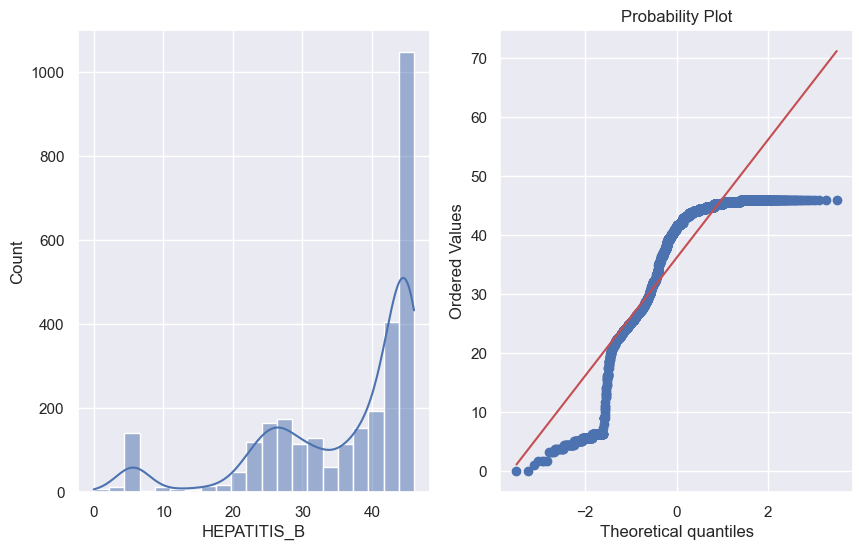

POLIO
SKEW BEFORE EXPONENTIAL TRANSFORMATION: -2.0568824701002297
SKEW AFTER TRANSFORMATION: -2.2337086090828344


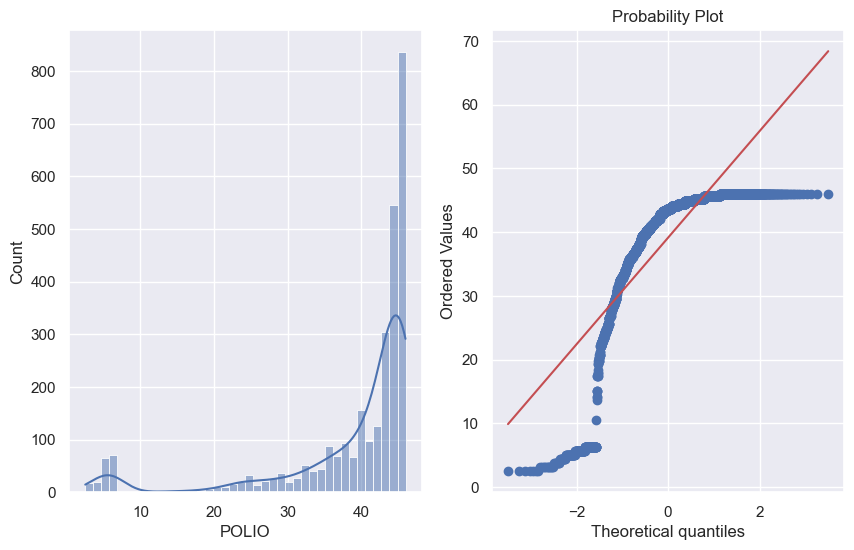

DIPHTHERIA
SKEW BEFORE EXPONENTIAL TRANSFORMATION: -2.033057535286581
SKEW AFTER TRANSFORMATION: -2.198213575753198


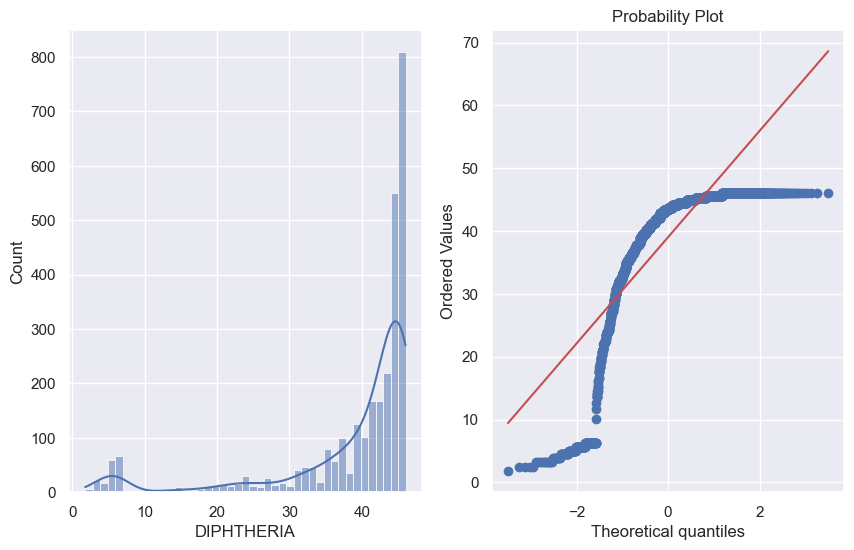

INCOME_COMPOSITION_OF_RESOURCES
SKEW BEFORE EXPONENTIAL TRANSFORMATION: -1.1760227590112124
SKEW AFTER TRANSFORMATION: -1.5604530263458696


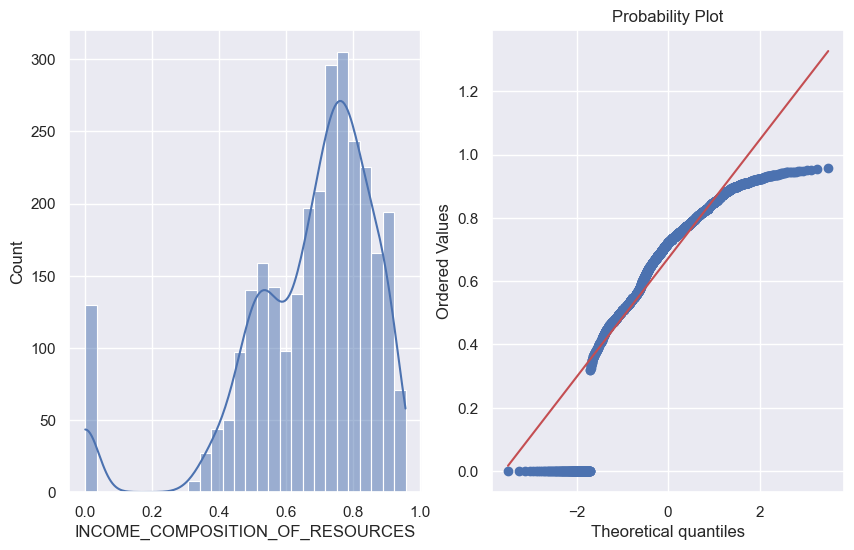

In [10]:
#exponential
for var in left_skew:
    print(var)
    print("SKEW BEFORE EXPONENTIAL TRANSFORMATION:",life_transform[var].skew())
    temp_df=pd.DataFrame(np.power(life_transform[var],(1/1.2))) #using this instead of np.exp as the values generated by np.exp take too long to plot
    plot_skew(temp_df,var)

### YeoJohnson

LIFE_EXPECTANCY
SKEW BEFORE YEOJOHNSON TRANSFORMATION: -0.6370026735578247
SKEW AFTER TRANSFORMATION: -0.10357525955075347


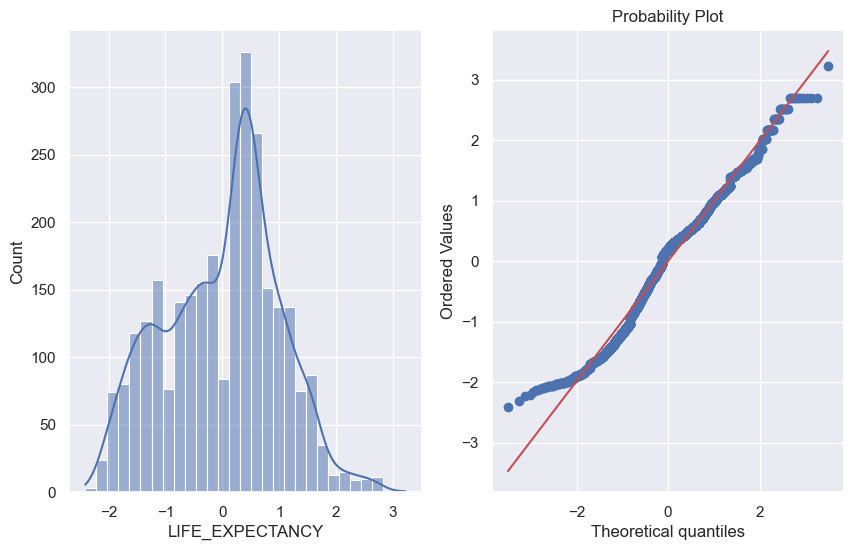

HEPATITIS_B
SKEW BEFORE YEOJOHNSON TRANSFORMATION: -1.137805052112449
SKEW AFTER TRANSFORMATION: -0.6180573284365157


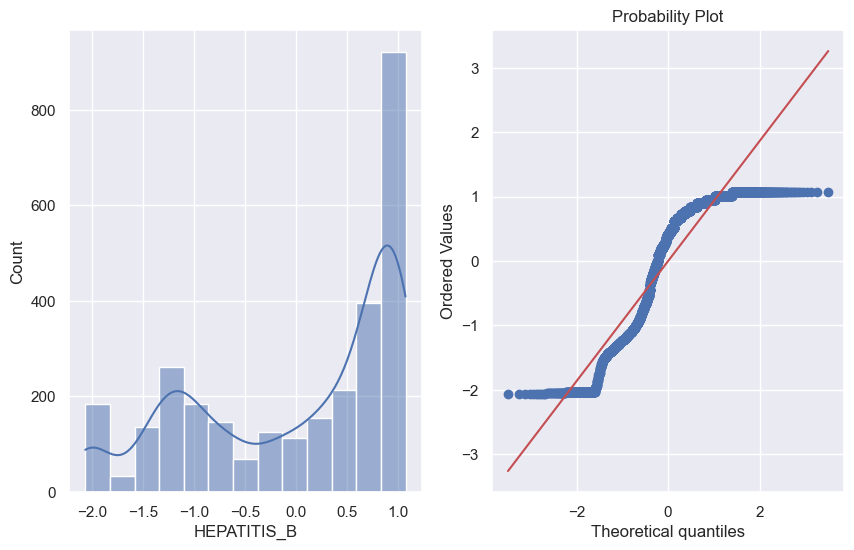

POLIO
SKEW BEFORE YEOJOHNSON TRANSFORMATION: -2.0568824701002297
SKEW AFTER TRANSFORMATION: -1.0083723398330582


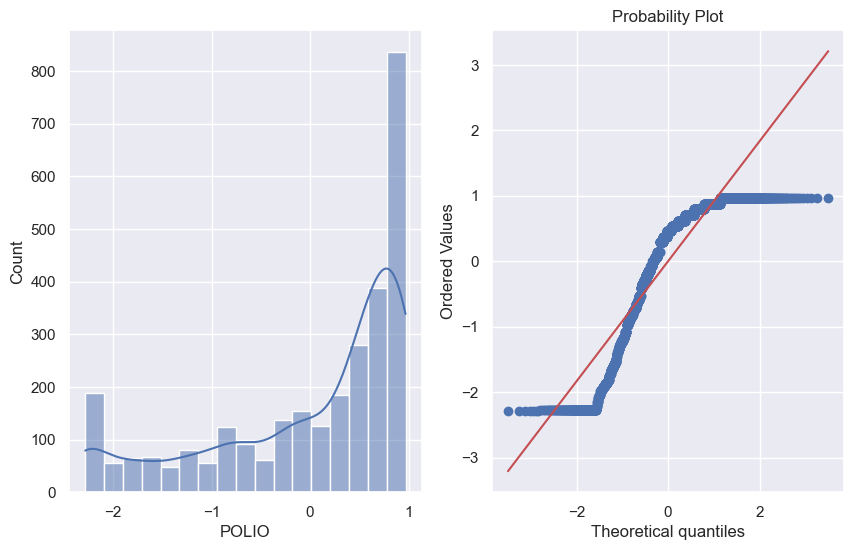

DIPHTHERIA
SKEW BEFORE YEOJOHNSON TRANSFORMATION: -2.033057535286581
SKEW AFTER TRANSFORMATION: -1.0239229515360293


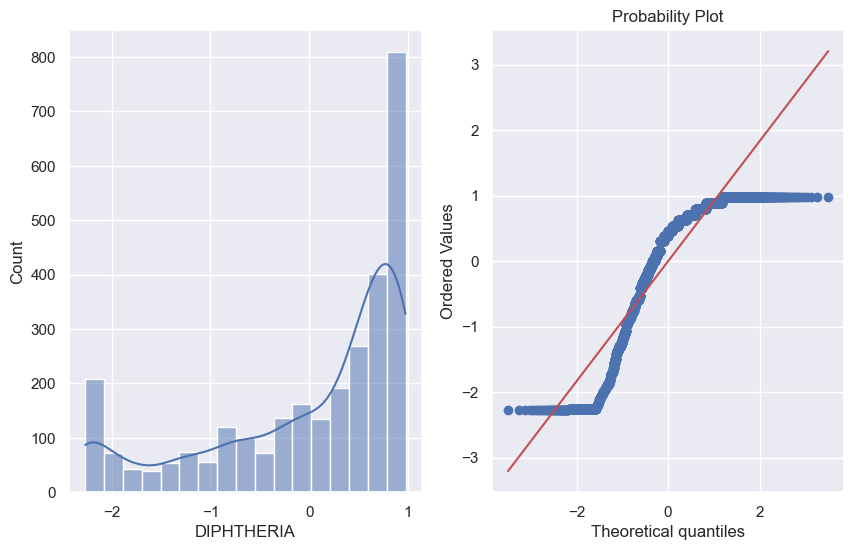

INCOME_COMPOSITION_OF_RESOURCES
SKEW BEFORE YEOJOHNSON TRANSFORMATION: -1.1760227590112124
SKEW AFTER TRANSFORMATION: -0.13944185613361815


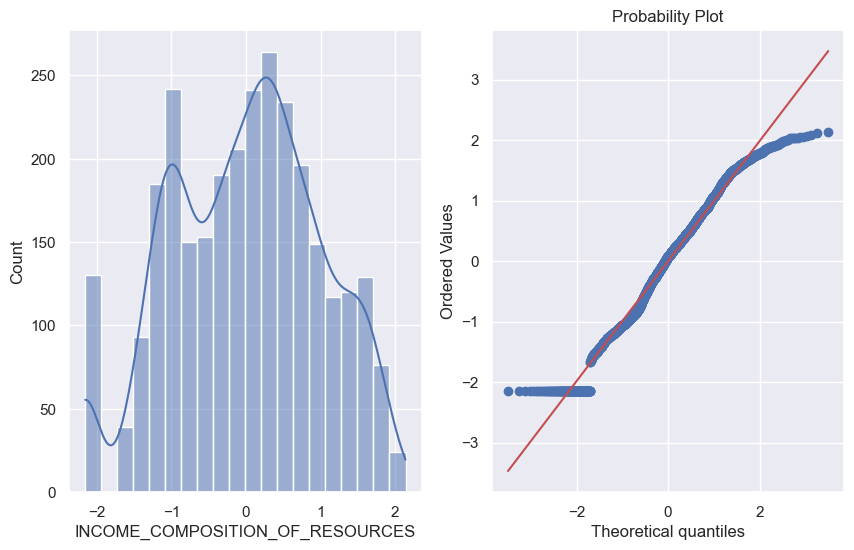

In [11]:
#yeojohnson
for var in left_skew:
    transformer=PowerTransformer(method='yeo-johnson')
    print(var)
    print("SKEW BEFORE YEOJOHNSON TRANSFORMATION:",life_transform[var].skew())
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    plot_skew(temp_df,var)

### Quantile

LIFE_EXPECTANCY
SKEW BEFORE QUANTILE TRANSFORMATION: -0.6370026735578247
SKEW AFTER TRANSFORMATION: -0.017178628708067436


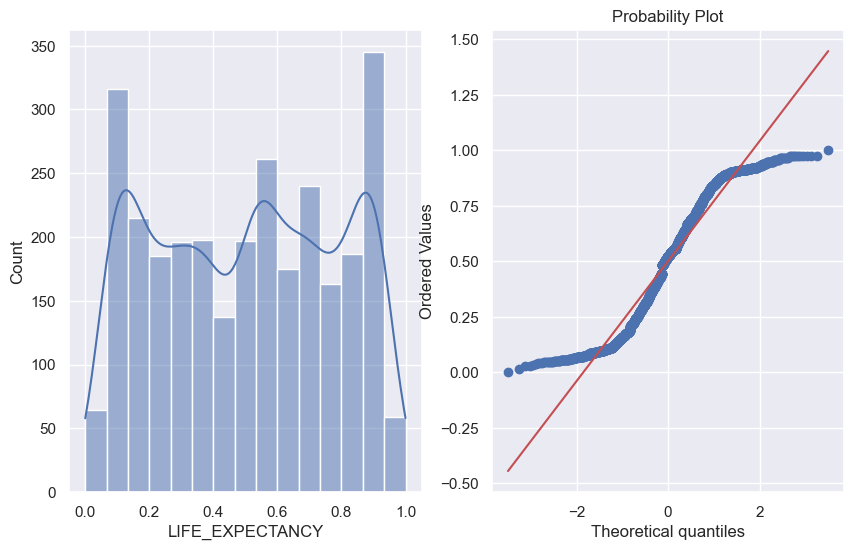

HEPATITIS_B
SKEW BEFORE QUANTILE TRANSFORMATION: -1.137805052112449
SKEW AFTER TRANSFORMATION: 0.04867332130125802


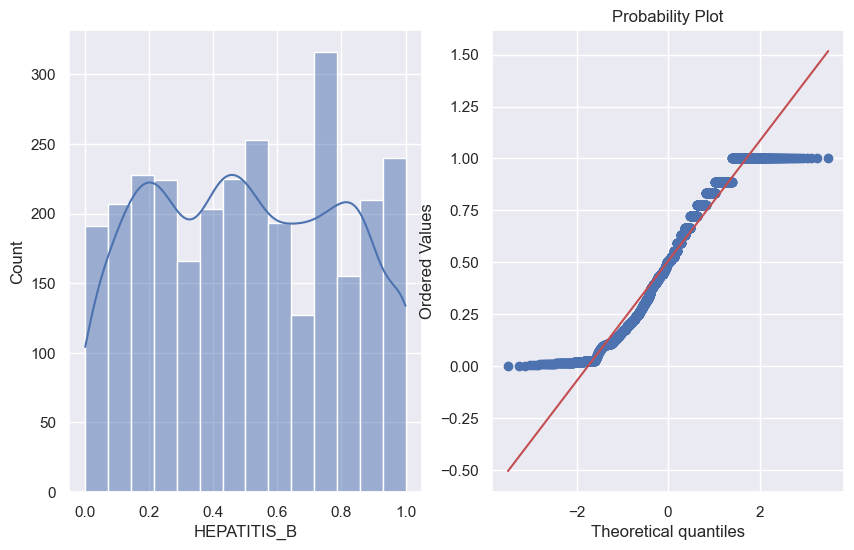

POLIO
SKEW BEFORE QUANTILE TRANSFORMATION: -2.0568824701002297
SKEW AFTER TRANSFORMATION: 0.08937668468144719


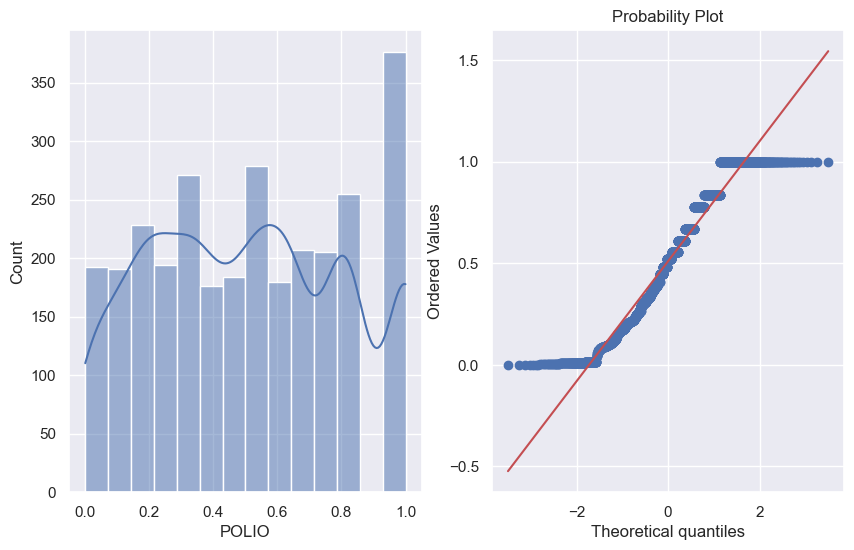

DIPHTHERIA
SKEW BEFORE QUANTILE TRANSFORMATION: -2.033057535286581
SKEW AFTER TRANSFORMATION: 0.10406099825168227


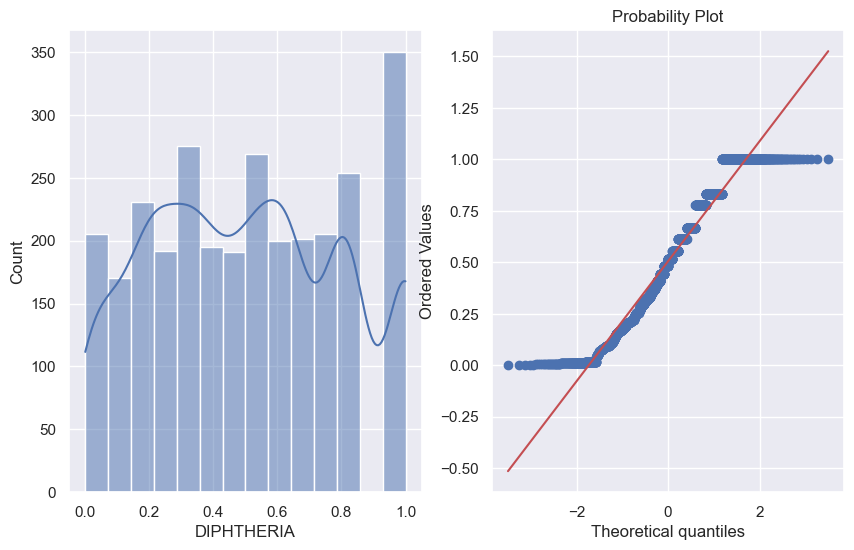

INCOME_COMPOSITION_OF_RESOURCES
SKEW BEFORE QUANTILE TRANSFORMATION: -1.1760227590112124
SKEW AFTER TRANSFORMATION: -0.035628831348955003


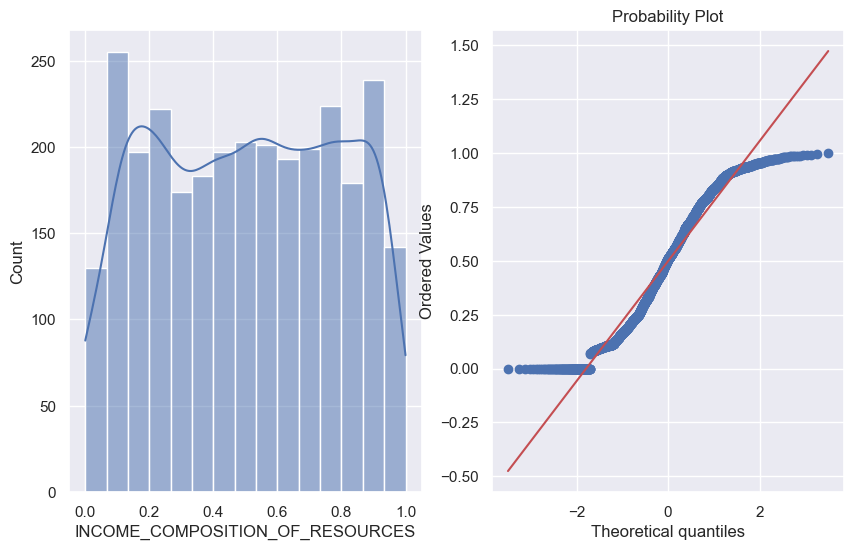

In [12]:
#quantile
for var in left_skew:
    transformer=QuantileTransformer(n_quantiles=10, random_state=0)
    print(var)
    print("SKEW BEFORE QUANTILE TRANSFORMATION:",life_transform[var].skew())
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    plot_skew(temp_df,var)

So far, it seems like yeojohnson transformation and quantile transformations produced the lowest skew, post transformation for most of the features including `INCOME_COMPOSITION_OF_RESOURCES`.
We will make a function find out the best transformation for each feature based on the skew post correction.

## Left skew results

In [13]:
for var in left_skew:
    transformer=PowerTransformer(method='yeo-johnson')
    transformer2=QuantileTransformer(n_quantiles=10, random_state=0)
    max=abs(life_transform[var].skew())
    best='None'
    
    #square
    temp_df=pd.DataFrame(np.power(life_transform[var],2))
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='Sqaure'
    
    #exponential
    temp_df=pd.DataFrame(np.power(life_transform[var],(1/1.2)))
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='Exponential'
    
    #yeojohnson
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='yeojohnson'
        
    #quantile
    temp_array=transformer2.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='quantile'
    
    
    #result
    print("The best transformation for",var,"is",best,'----->',max.round(4))
    

The best transformation for LIFE_EXPECTANCY is quantile -----> 0.0172
The best transformation for HEPATITIS_B is quantile -----> 0.0487
The best transformation for POLIO is quantile -----> 0.0894
The best transformation for DIPHTHERIA is quantile -----> 0.1041
The best transformation for INCOME_COMPOSITION_OF_RESOURCES is quantile -----> 0.0356


## For right skew
we will try the following transformations:
- logarithmic transformation
- reciprocal transformation
- square root transformation 
- cube root transformation
- yeojohnson transformation using scikit learn power transformer
- quantile transformation using scikit learn quantile transformer

### Logarithmic

ADULT_MORTALITY
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 1.1637489741549902
SKEW AFTER TRANSFORMATION: -0.7379699121338162


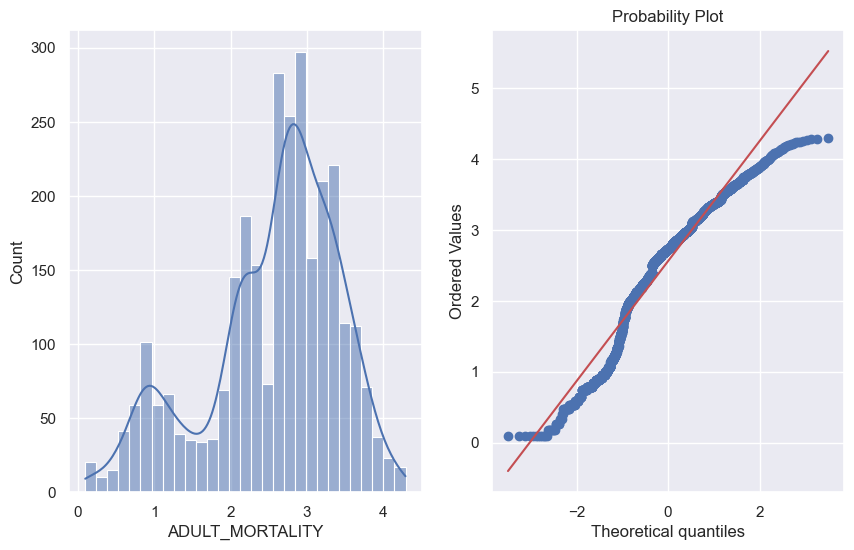

INFANT_DEATHS
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 2.5565232509355993
SKEW AFTER TRANSFORMATION: 0.3947540525149132


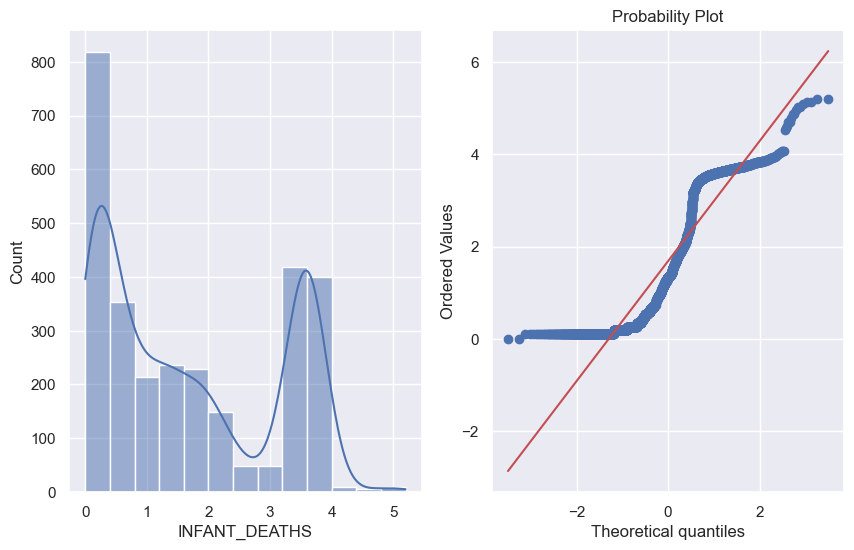

ALCOHOL
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 1.9608855687480065
SKEW AFTER TRANSFORMATION: -0.08845003407625769


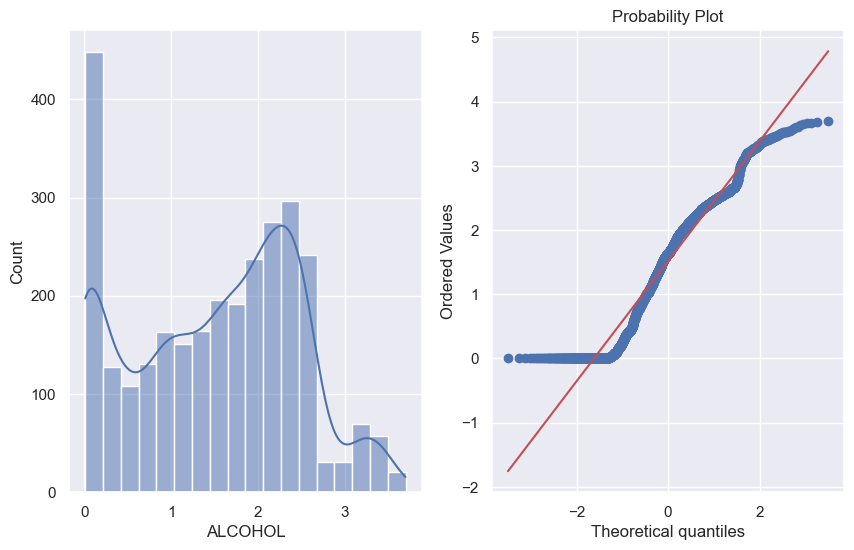

PERCENTAGE_EXPENDITURE
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 1.6032576952363025
SKEW AFTER TRANSFORMATION: -0.02207003300929478


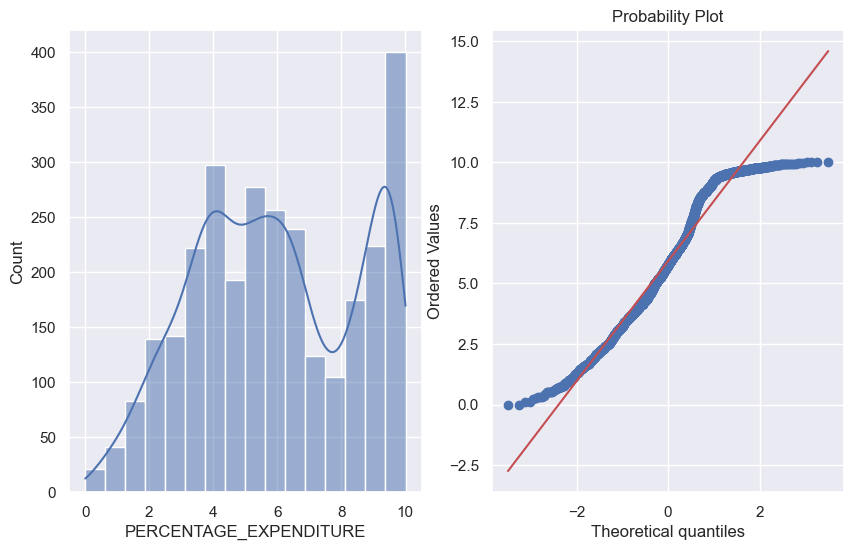

MEASLES
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 9.441331947061583
SKEW AFTER TRANSFORMATION: 1.0441179184460359


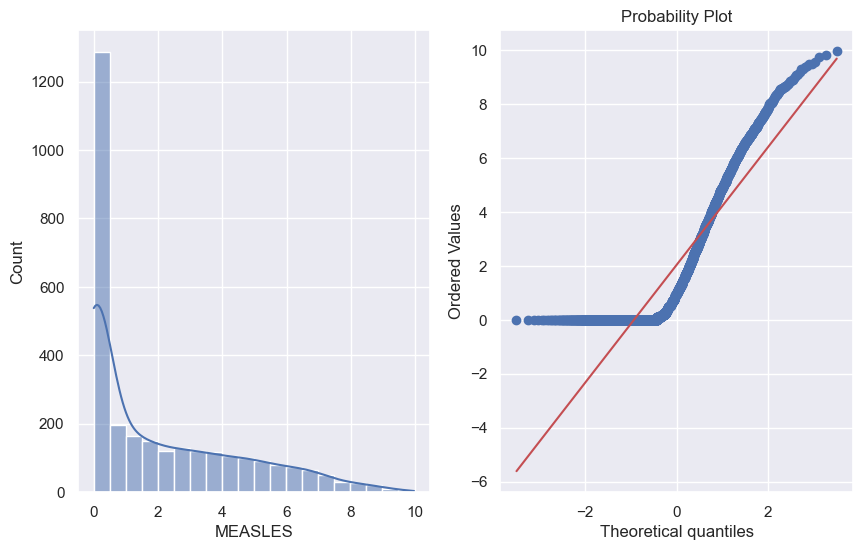

UNDER_FIVE_DEATHS
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 2.647119700035849
SKEW AFTER TRANSFORMATION: 0.36189559730719906


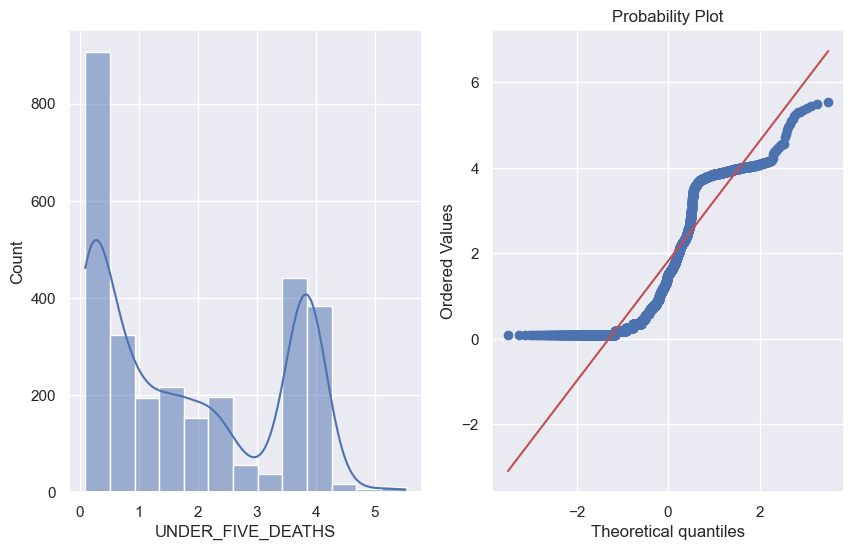

TOTAL_EXPENDITURE
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 2.0484470605631637
SKEW AFTER TRANSFORMATION: 0.23377692199844646


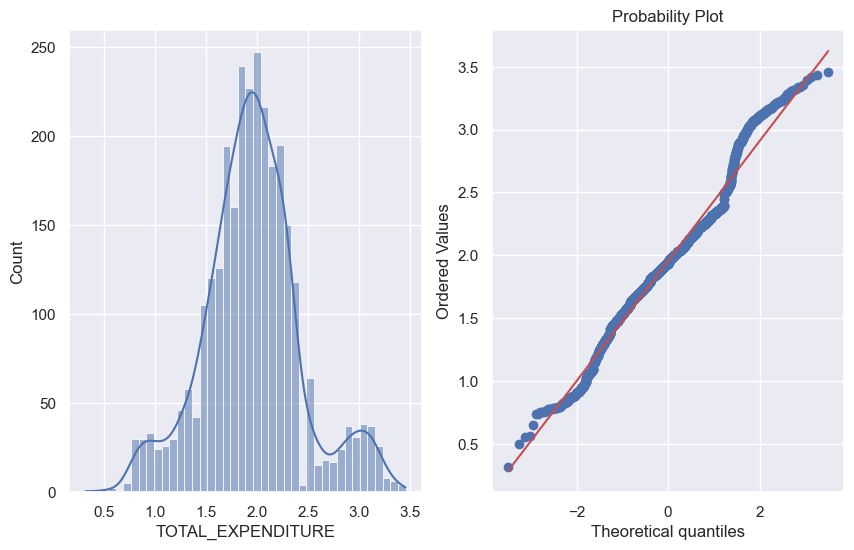

HIV/AIDS
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 5.396112042126371
SKEW AFTER TRANSFORMATION: 3.5478401593985263


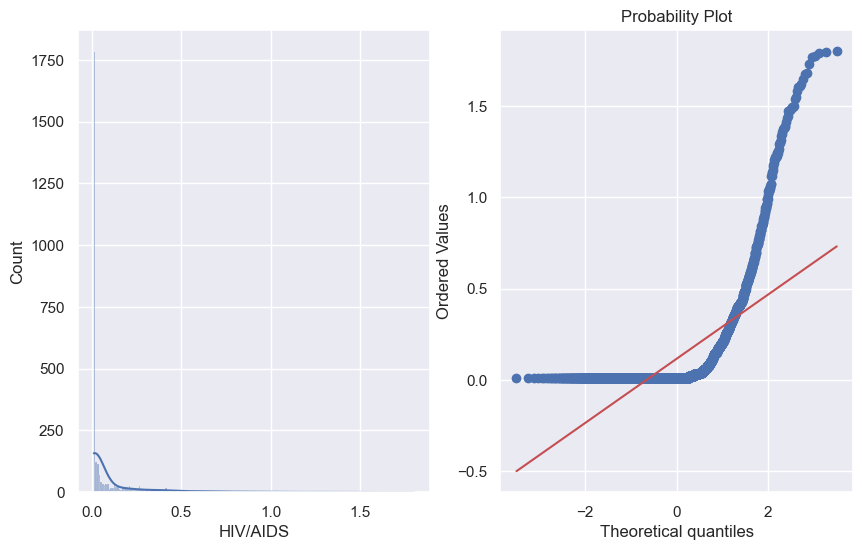

GDP
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 1.712521787860184
SKEW AFTER TRANSFORMATION: -0.044996165394103976


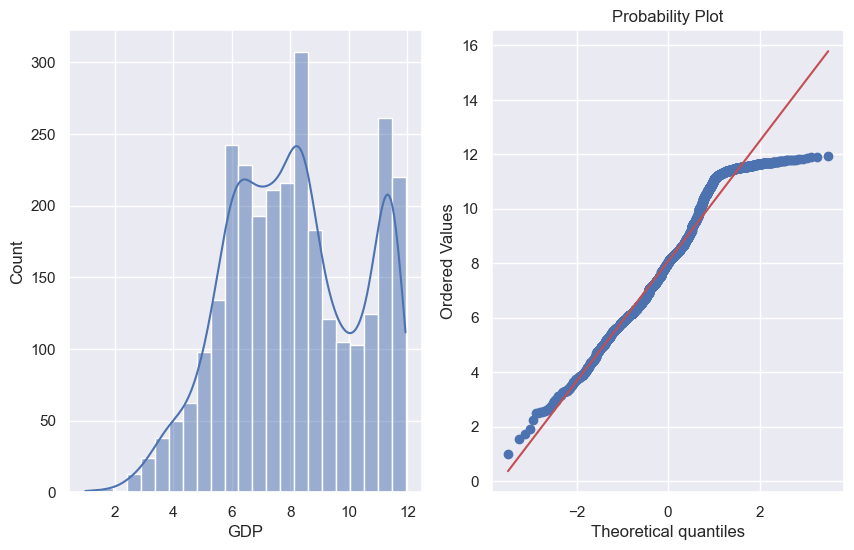

POPULATION
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 2.6944672607438744
SKEW AFTER TRANSFORMATION: -1.2898156047844858


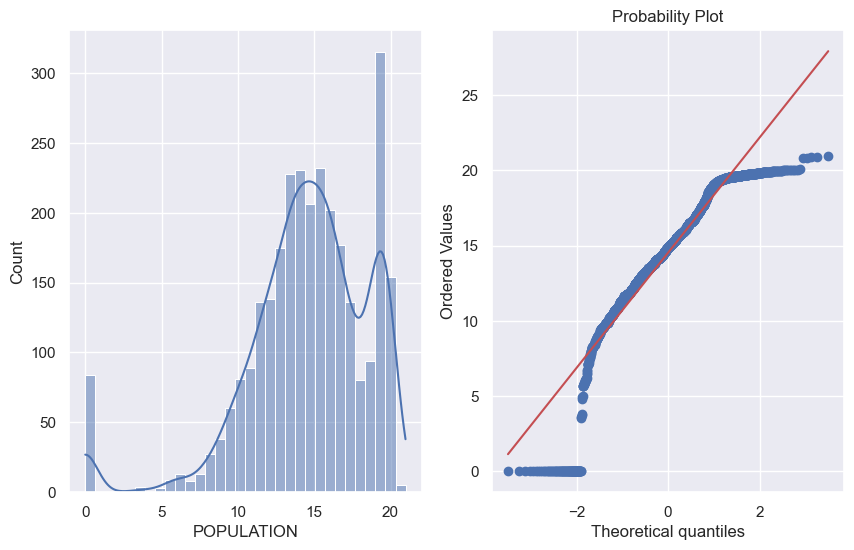

THINNESS_5_to_19_YEARS
SKEW BEFORE LOGARITHMIC TRANSFORMATION: 1.6877112244369756
SKEW AFTER TRANSFORMATION: -0.10301242495702649


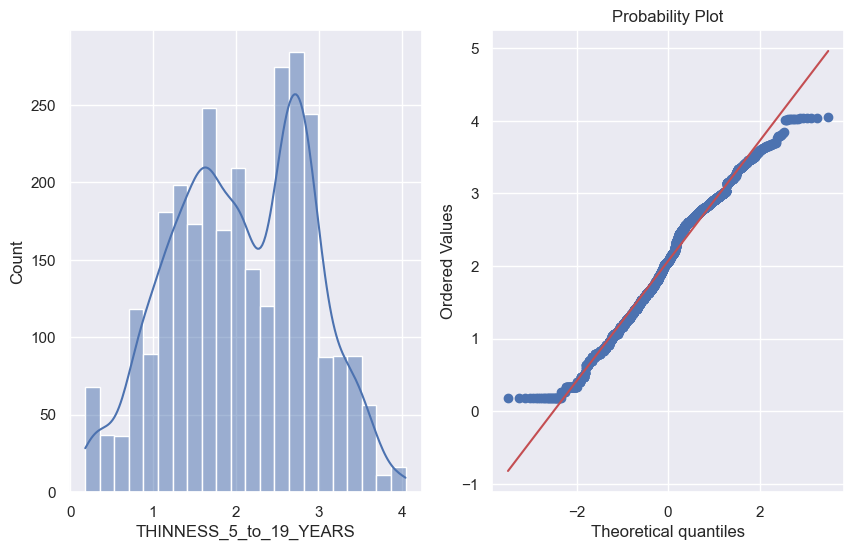

In [14]:
#logarithmic
for var in right_skew:
    print(var)
    print("SKEW BEFORE LOGARITHMIC TRANSFORMATION:",life_transform[var].skew())
    temp_df=pd.DataFrame(np.log1p(life_transform[var]))
    plot_skew(temp_df,var)

### Reciprocal

ADULT_MORTALITY
SKEW BEFORE RECIPROCAL TRANSFORMATION: 1.1637489741549902
SKEW AFTER TRANSFORMATION: 10.46679024393619


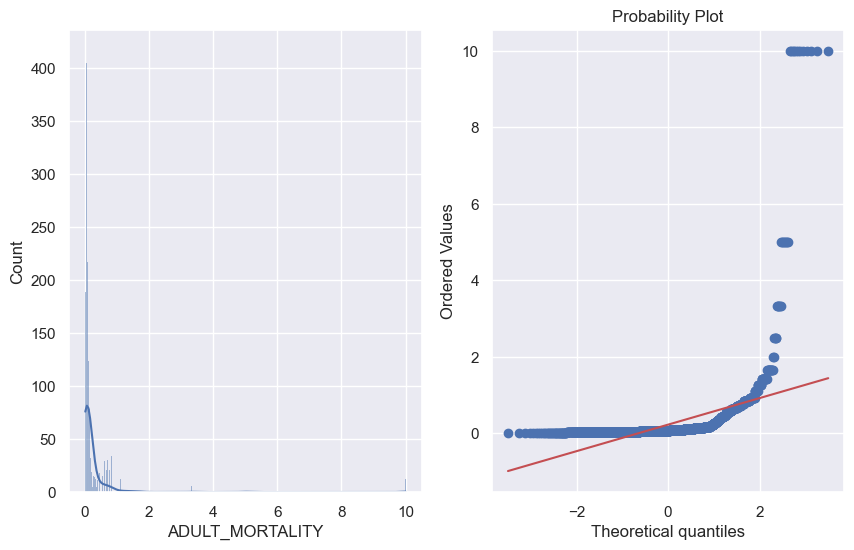

INFANT_DEATHS
SKEW BEFORE RECIPROCAL TRANSFORMATION: 2.5565232509355993
SKEW AFTER TRANSFORMATION: nan


C:\Users\TdrDi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


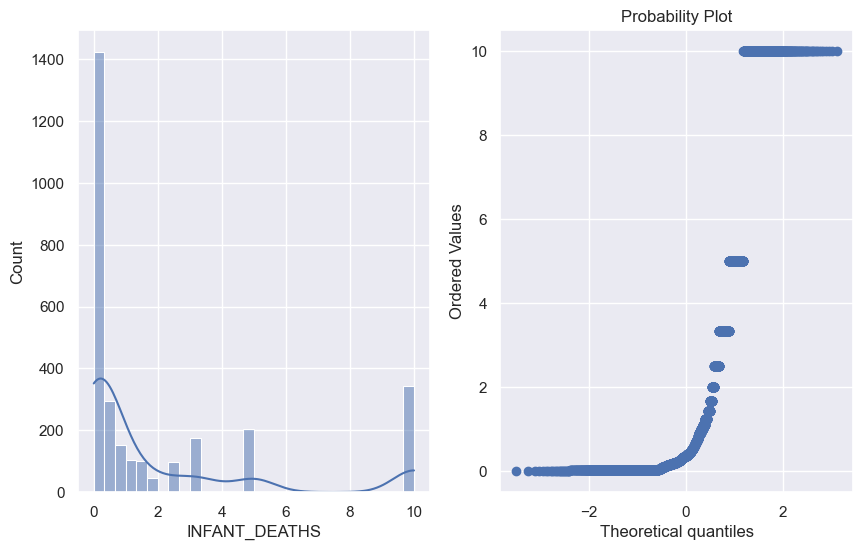

ALCOHOL
SKEW BEFORE RECIPROCAL TRANSFORMATION: 1.9608855687480065
SKEW AFTER TRANSFORMATION: 2.608359655621734


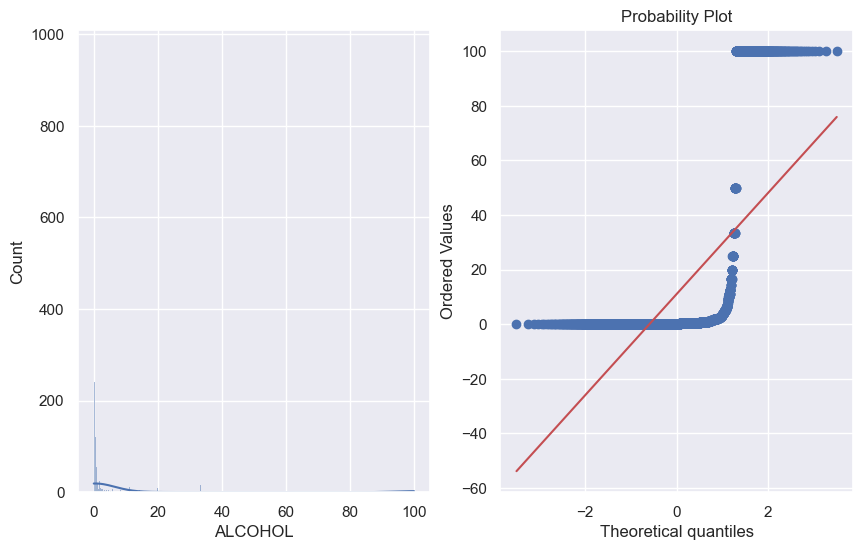

PERCENTAGE_EXPENDITURE
SKEW BEFORE RECIPROCAL TRANSFORMATION: 1.6032576952363025


C:\Users\TdrDi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


SKEW AFTER TRANSFORMATION: nan


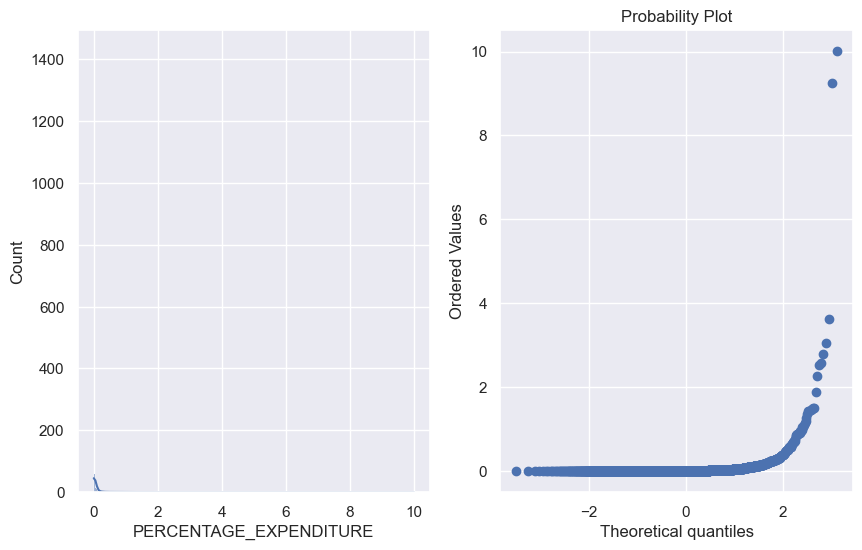

MEASLES
SKEW BEFORE RECIPROCAL TRANSFORMATION: 9.441331947061583
SKEW AFTER TRANSFORMATION: nan


C:\Users\TdrDi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


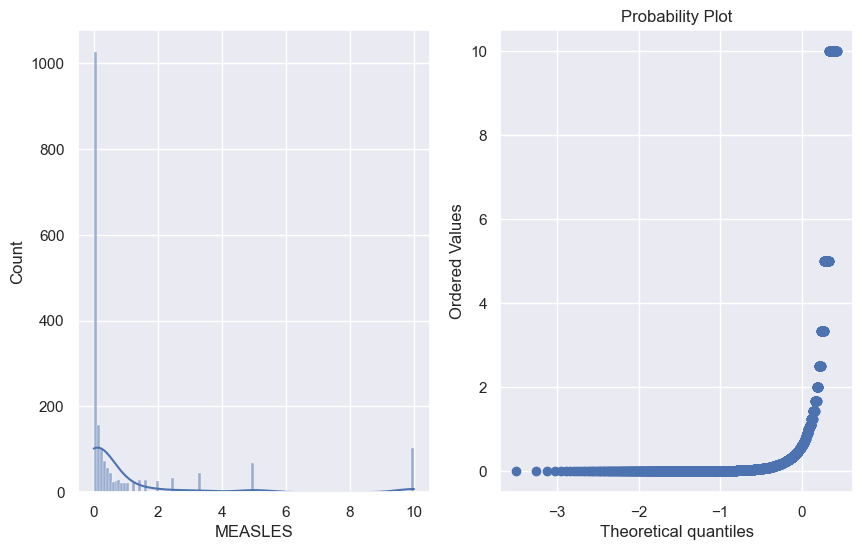

UNDER_FIVE_DEATHS
SKEW BEFORE RECIPROCAL TRANSFORMATION: 2.647119700035849
SKEW AFTER TRANSFORMATION: 1.72003132132093


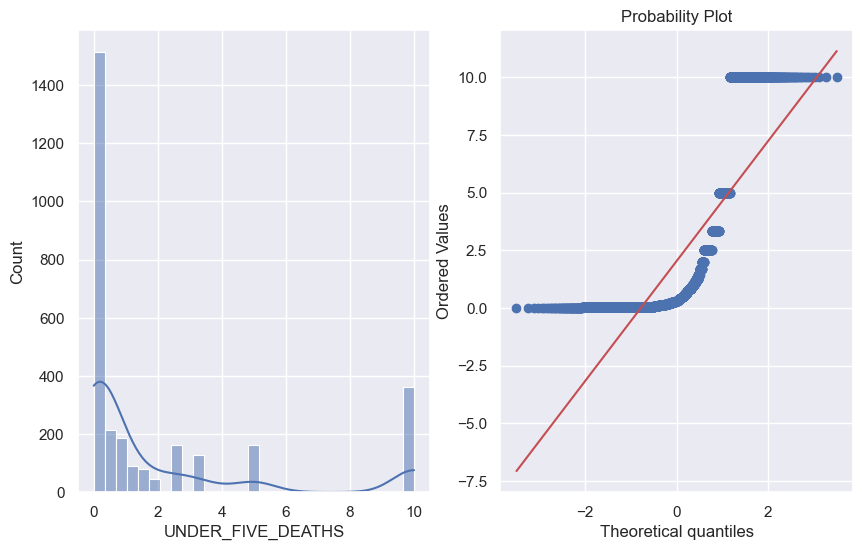

TOTAL_EXPENDITURE
SKEW BEFORE RECIPROCAL TRANSFORMATION: 2.0484470605631637
SKEW AFTER TRANSFORMATION: 4.021819882595957


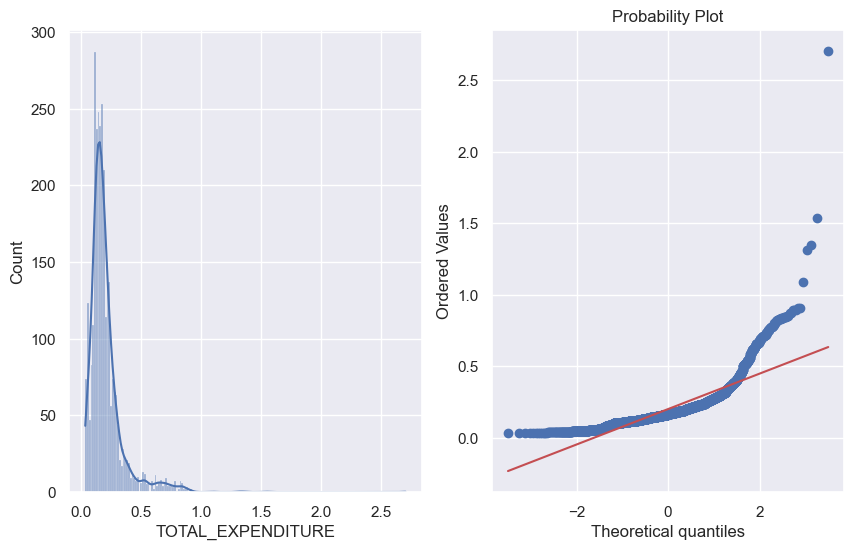

HIV/AIDS
SKEW BEFORE RECIPROCAL TRANSFORMATION: 5.396112042126371
SKEW AFTER TRANSFORMATION: -0.5732763995191001


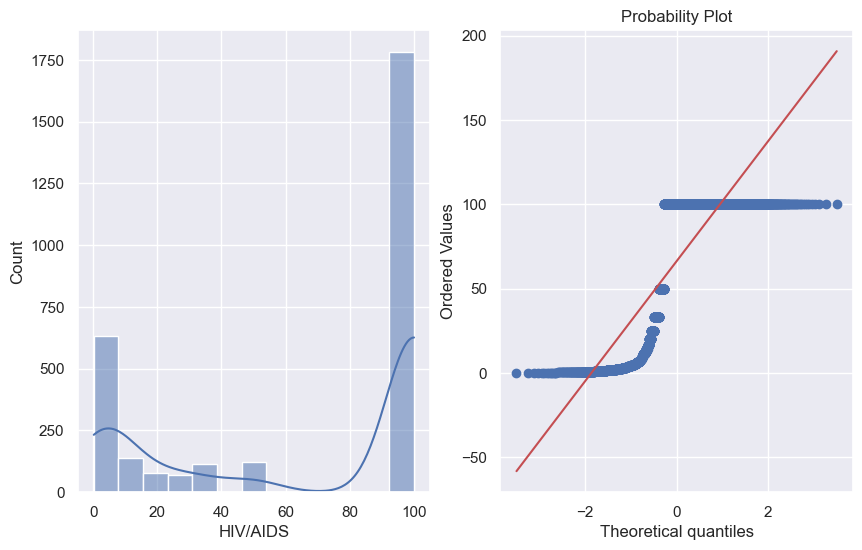

GDP
SKEW BEFORE RECIPROCAL TRANSFORMATION: 1.712521787860184
SKEW AFTER TRANSFORMATION: 24.21733336531047


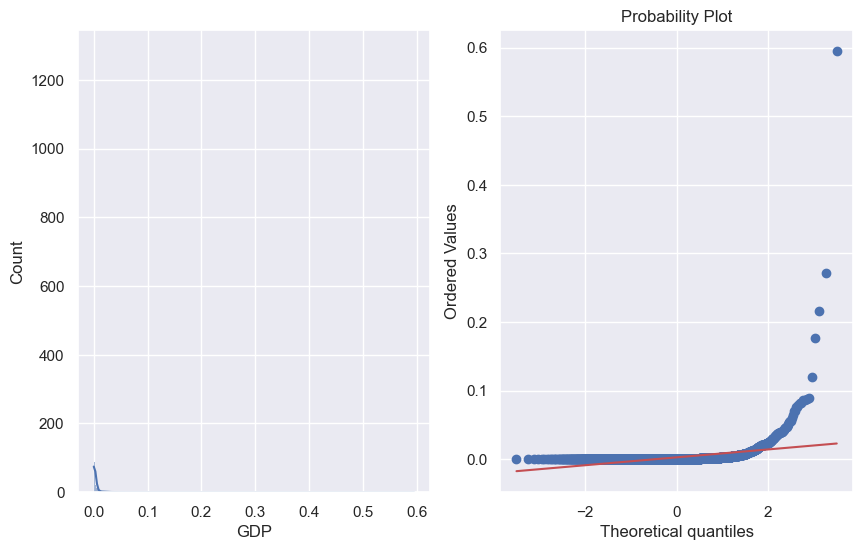

POPULATION
SKEW BEFORE RECIPROCAL TRANSFORMATION: 2.6944672607438744


C:\Users\TdrDi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


SKEW AFTER TRANSFORMATION: nan


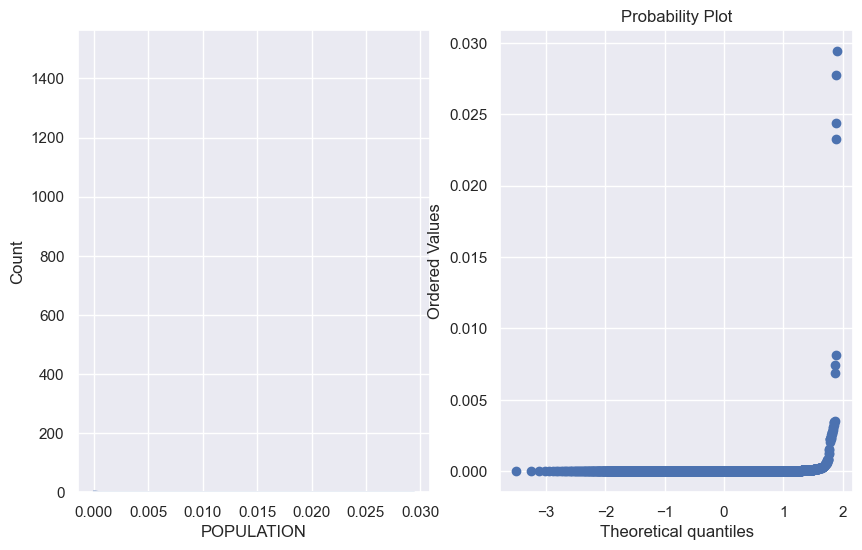

THINNESS_5_to_19_YEARS
SKEW BEFORE RECIPROCAL TRANSFORMATION: 1.6877112244369756
SKEW AFTER TRANSFORMATION: 5.4575871675578735


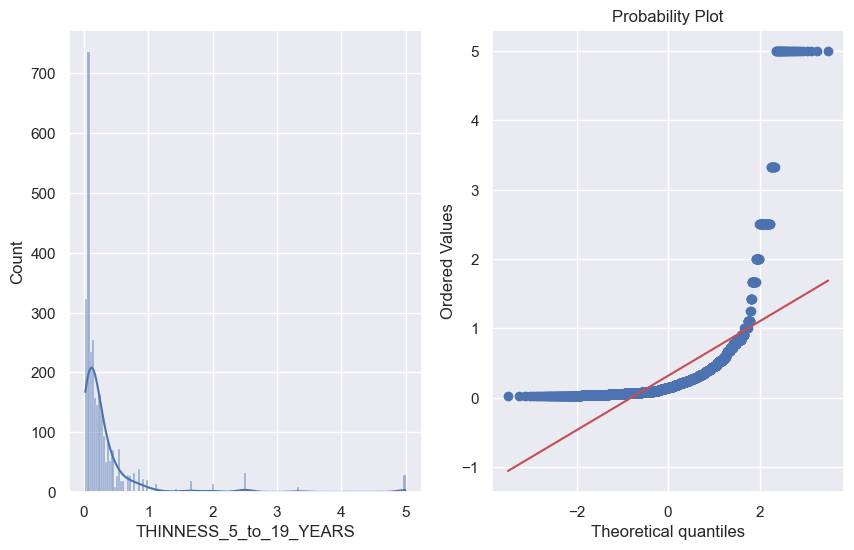

In [15]:
#reciprocal
for var in right_skew:
    print(var)
    print("SKEW BEFORE RECIPROCAL TRANSFORMATION:",life_transform[var].skew())
    temp_df=pd.DataFrame(1/life_transform[var])
    temp_df.columns=[var]
    plot_skew(temp_df,var)

### Square root

ADULT_MORTALITY
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 1.1637489741549902
SKEW AFTER TRANSFORMATION: 0.09007826524110418


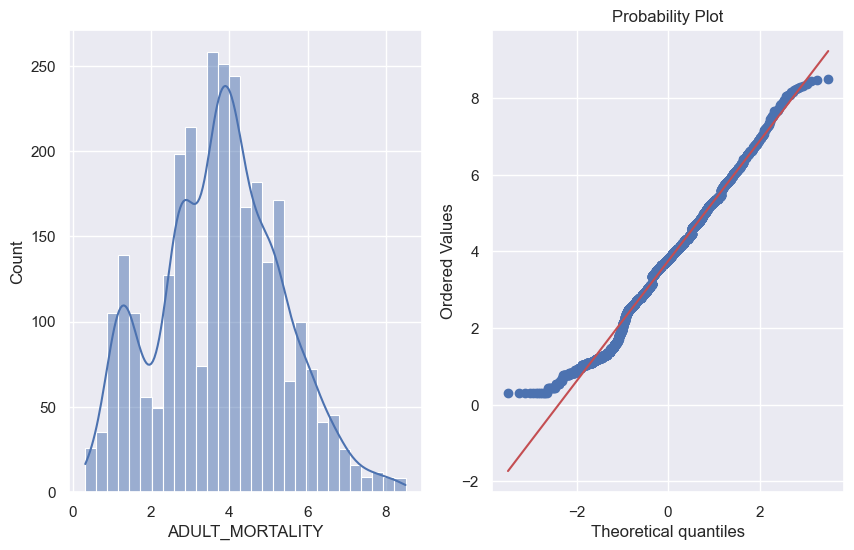

INFANT_DEATHS
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 2.5565232509355993
SKEW AFTER TRANSFORMATION: 0.839383854738622


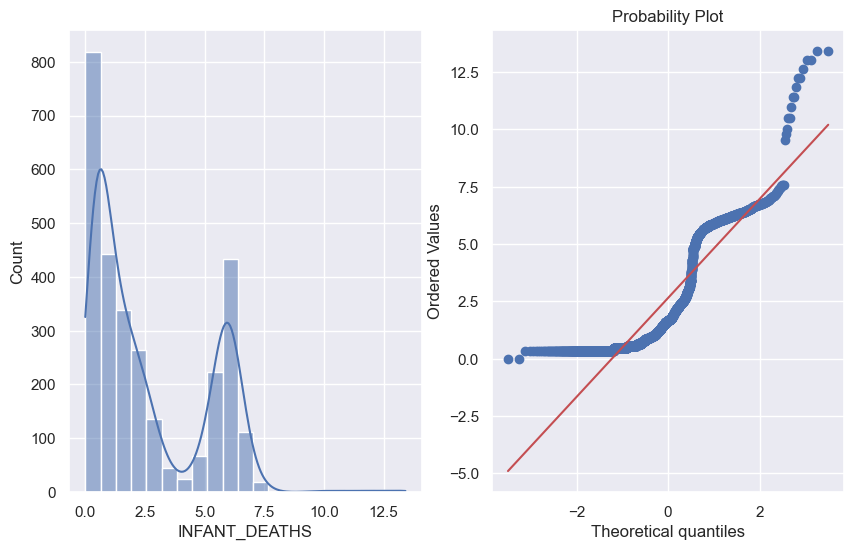

ALCOHOL
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 1.9608855687480065
SKEW AFTER TRANSFORMATION: 0.42630386725116476


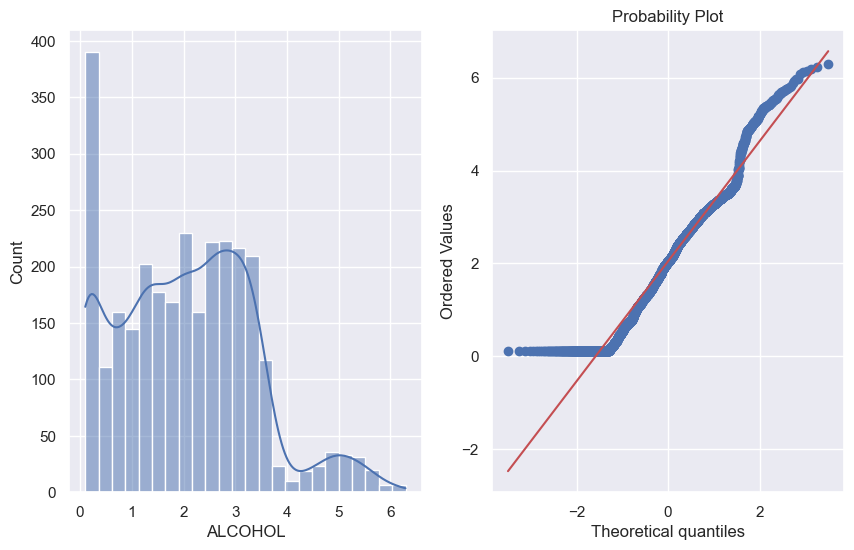

PERCENTAGE_EXPENDITURE
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 1.6032576952363025
SKEW AFTER TRANSFORMATION: 1.0935177509583573


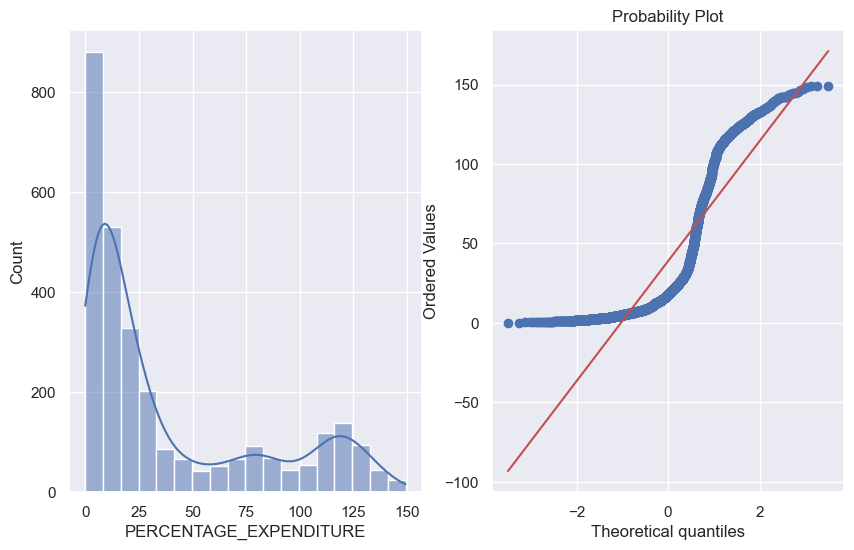

MEASLES
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 9.441331947061583
SKEW AFTER TRANSFORMATION: 4.172345600953934


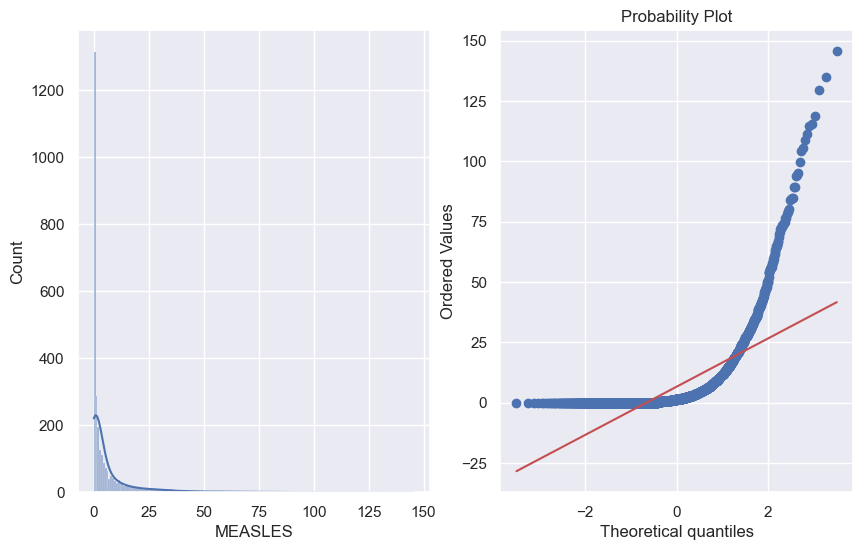

UNDER_FIVE_DEATHS
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 2.647119700035849
SKEW AFTER TRANSFORMATION: 0.8471492746470537


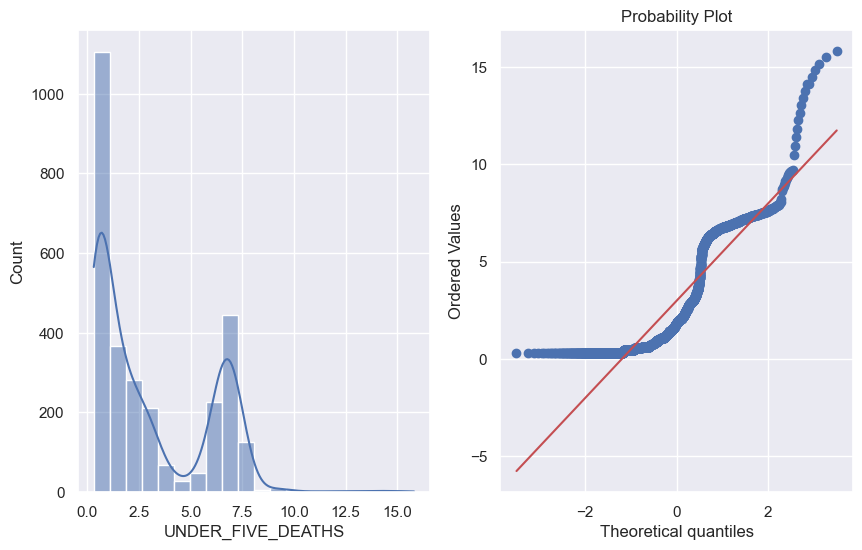

TOTAL_EXPENDITURE
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 2.0484470605631637
SKEW AFTER TRANSFORMATION: 1.0333190590685712


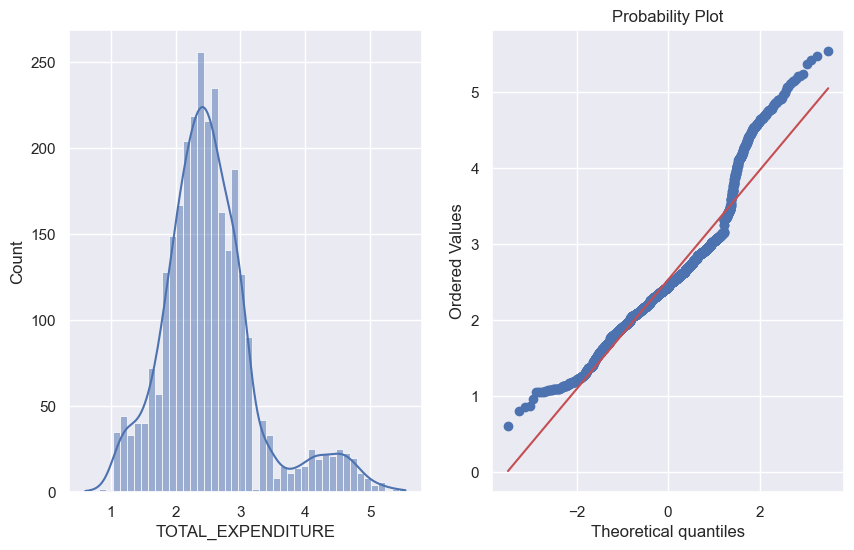

HIV/AIDS
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 5.396112042126371
SKEW AFTER TRANSFORMATION: 2.8559917256217138


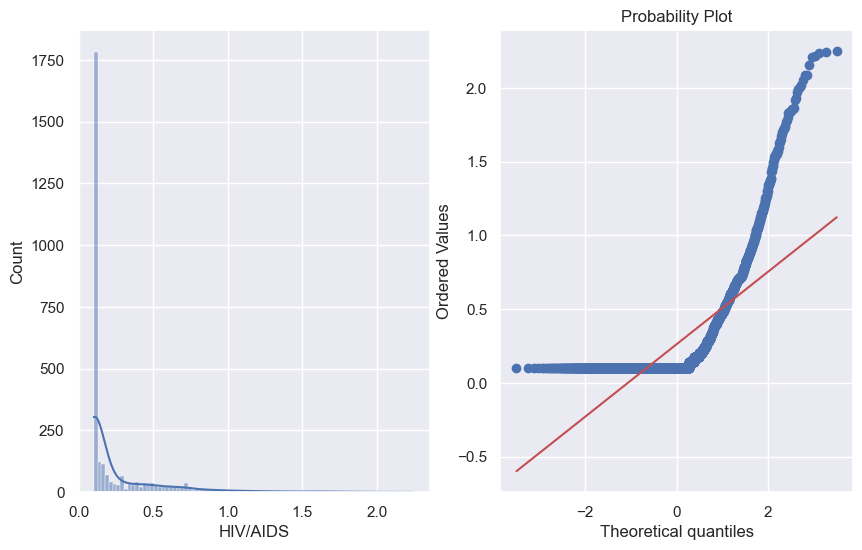

GDP
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 1.712521787860184
SKEW AFTER TRANSFORMATION: 1.2028423692898902


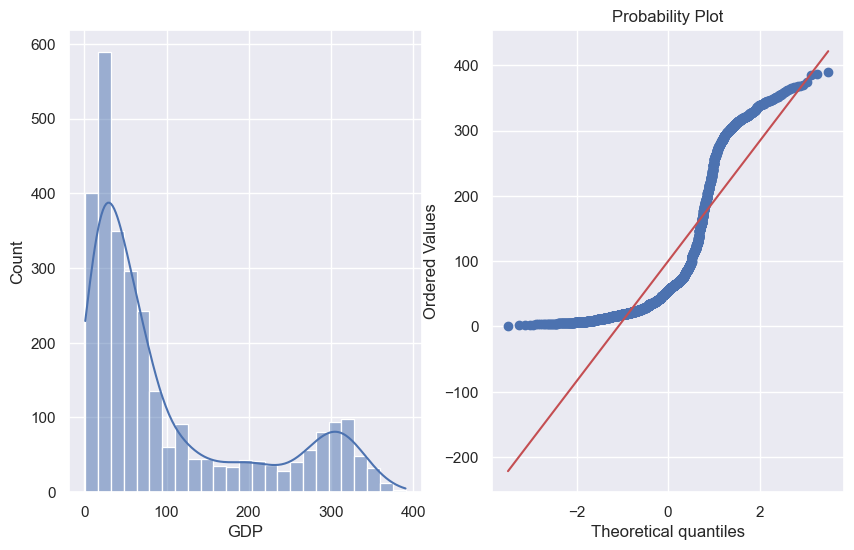

POPULATION
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 2.6944672607438744
SKEW AFTER TRANSFORMATION: 1.521834000530003


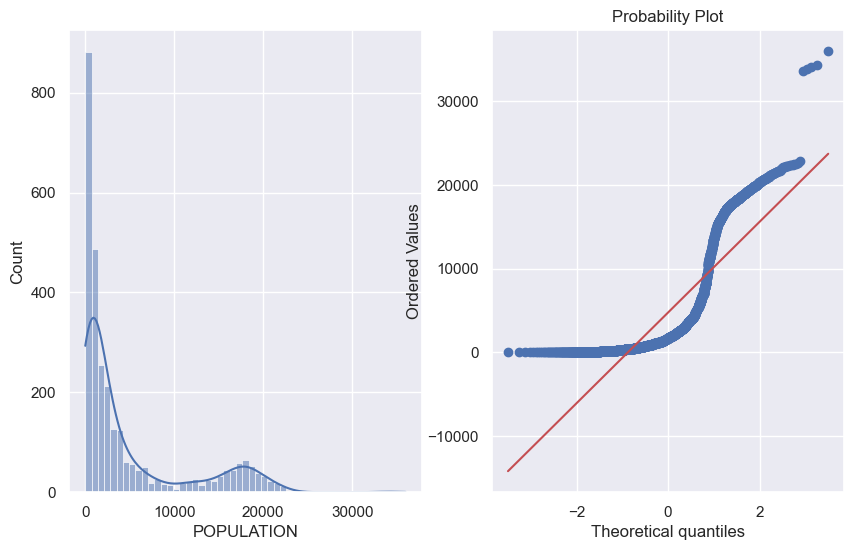

THINNESS_5_to_19_YEARS
SKEW BEFORE SQUARE ROOT TRANSFORMATION: 1.6877112244369756
SKEW AFTER TRANSFORMATION: 0.5754708977416925


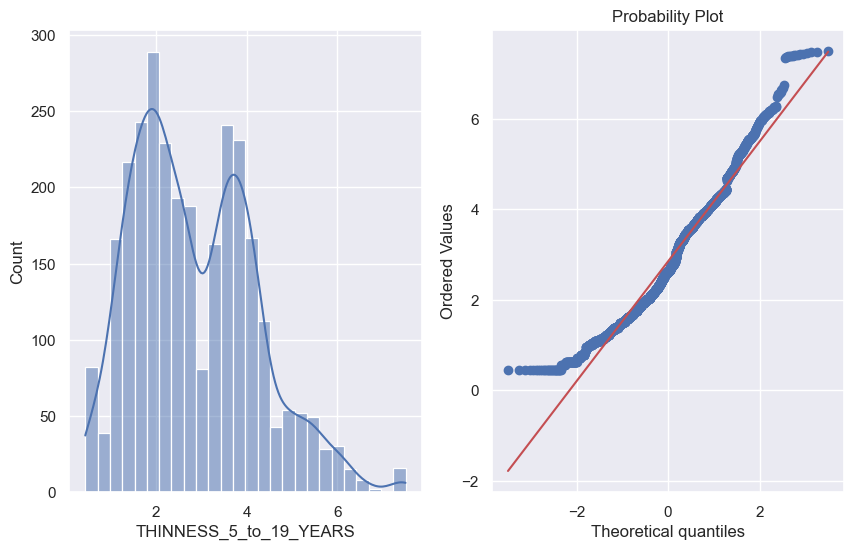

In [16]:
#square root
for var in right_skew:
    print(var)
    print("SKEW BEFORE SQUARE ROOT TRANSFORMATION:",life_transform[var].skew())
    temp_df=pd.DataFrame(np.power(life_transform[var],(1/2)))
    plot_skew(temp_df,var)

### Cube root

ADULT_MORTALITY
SKEW BEFORE CUBE ROOT TRANSFORMATION: 1.1637489741549902
SKEW AFTER TRANSFORMATION: -0.3048134194977041


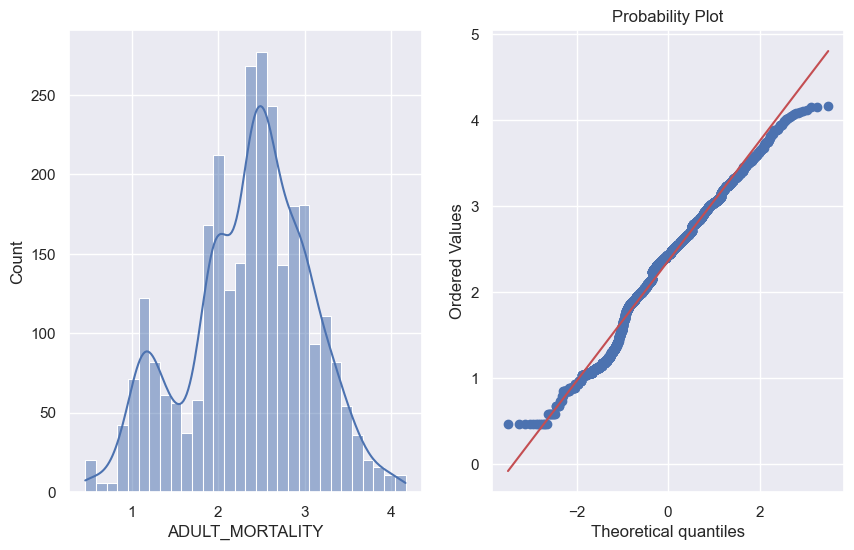

INFANT_DEATHS
SKEW BEFORE CUBE ROOT TRANSFORMATION: 2.5565232509355993
SKEW AFTER TRANSFORMATION: 0.5451523523450507


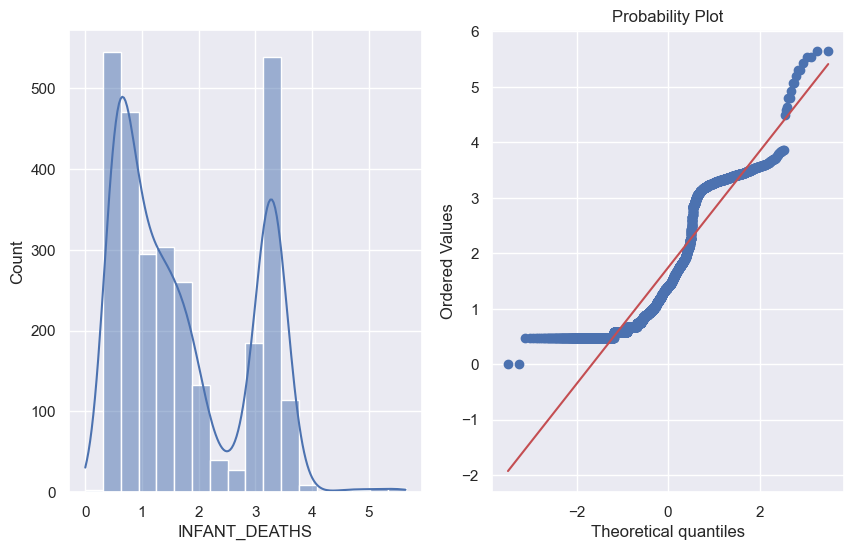

ALCOHOL
SKEW BEFORE CUBE ROOT TRANSFORMATION: 1.9608855687480065
SKEW AFTER TRANSFORMATION: -0.1406305483618359


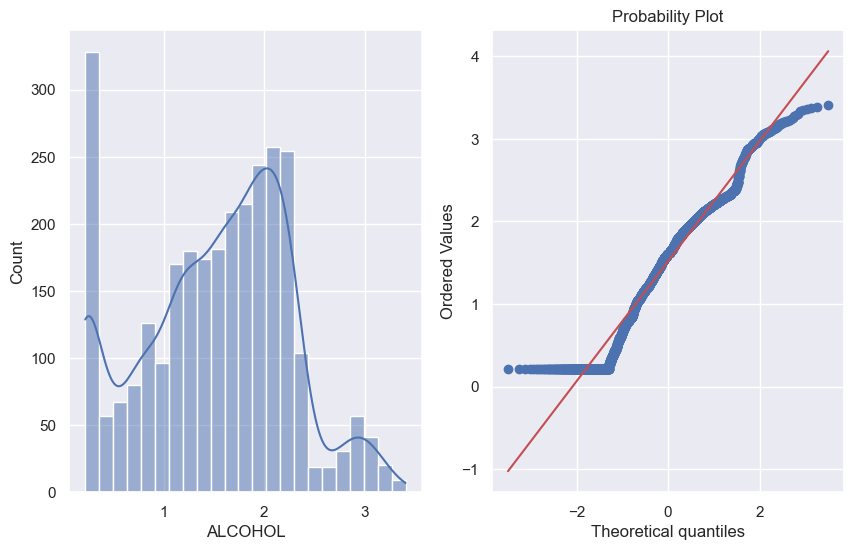

PERCENTAGE_EXPENDITURE
SKEW BEFORE CUBE ROOT TRANSFORMATION: 1.6032576952363025
SKEW AFTER TRANSFORMATION: 0.8350295189097884


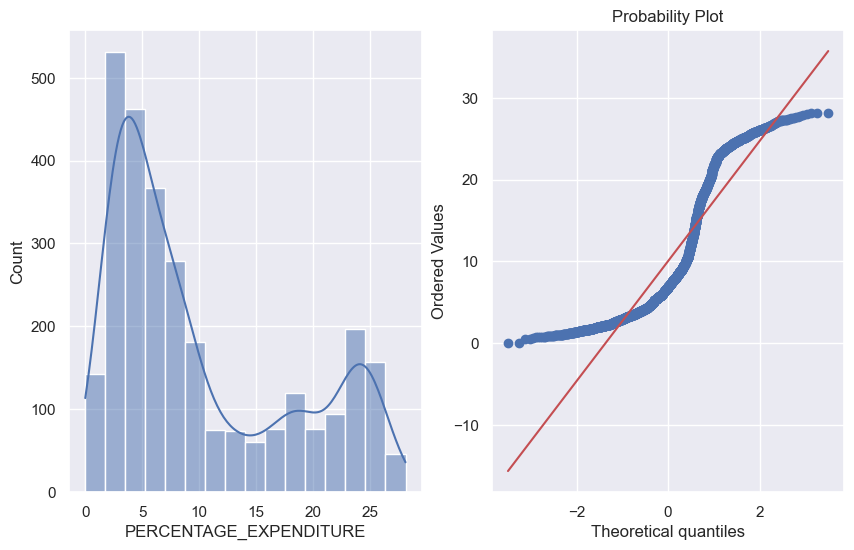

MEASLES
SKEW BEFORE CUBE ROOT TRANSFORMATION: 9.441331947061583
SKEW AFTER TRANSFORMATION: 2.5068574896708786


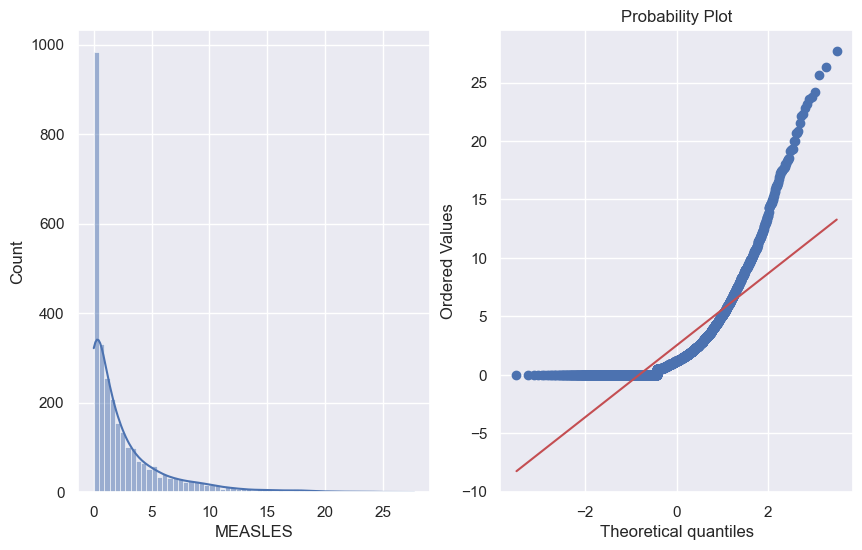

UNDER_FIVE_DEATHS
SKEW BEFORE CUBE ROOT TRANSFORMATION: 2.647119700035849
SKEW AFTER TRANSFORMATION: 0.5474258299180191


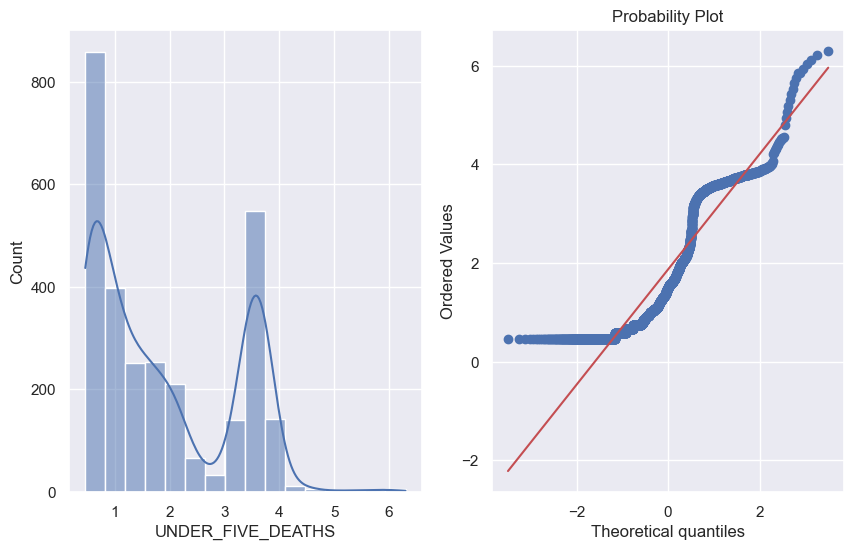

TOTAL_EXPENDITURE
SKEW BEFORE CUBE ROOT TRANSFORMATION: 2.0484470605631637
SKEW AFTER TRANSFORMATION: 0.6526962829352414


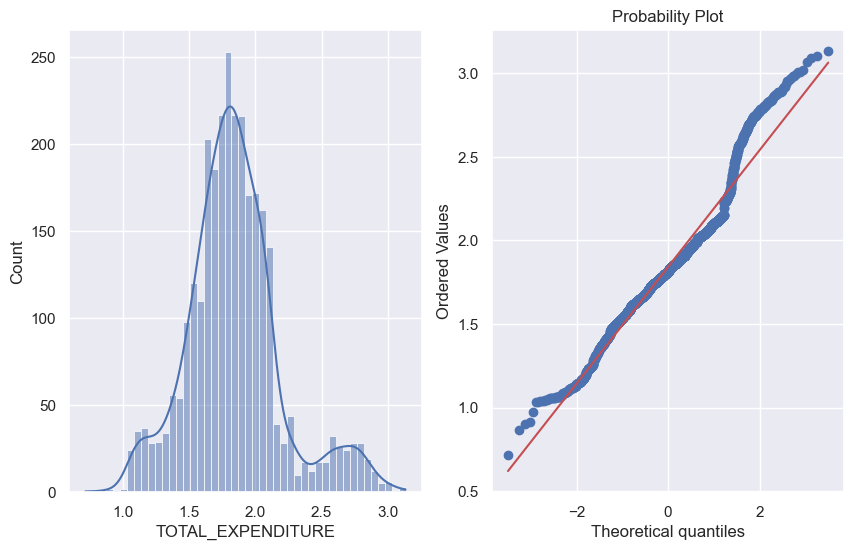

HIV/AIDS
SKEW BEFORE CUBE ROOT TRANSFORMATION: 5.396112042126371
SKEW AFTER TRANSFORMATION: 2.1682525413304585


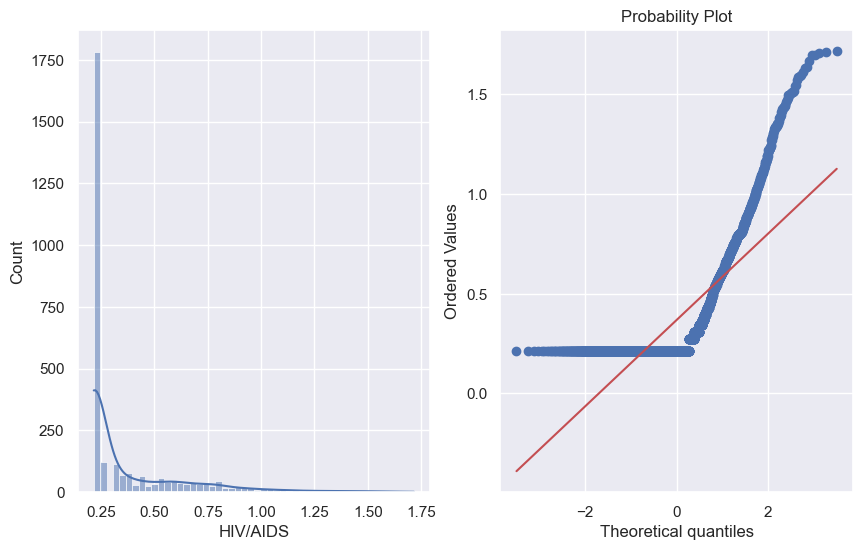

GDP
SKEW BEFORE CUBE ROOT TRANSFORMATION: 1.712521787860184
SKEW AFTER TRANSFORMATION: 0.9236688828698801


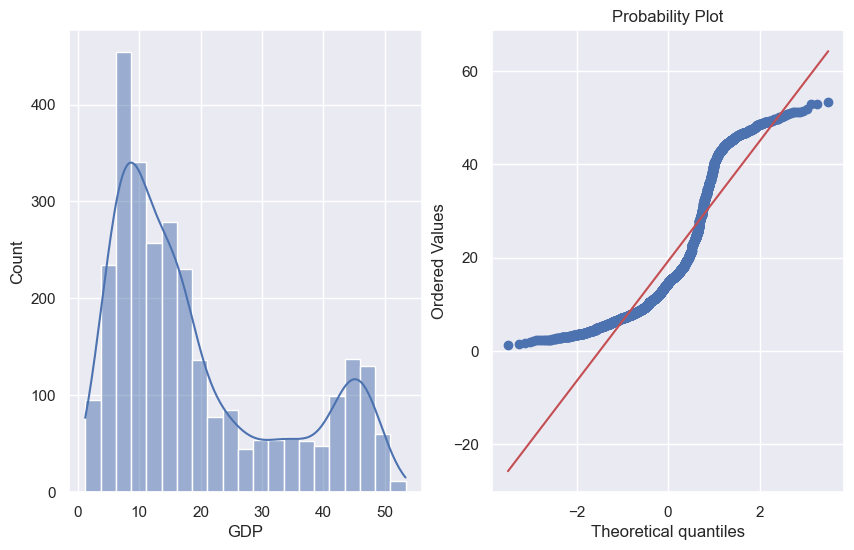

POPULATION
SKEW BEFORE CUBE ROOT TRANSFORMATION: 2.6944672607438744
SKEW AFTER TRANSFORMATION: 1.159259497125467


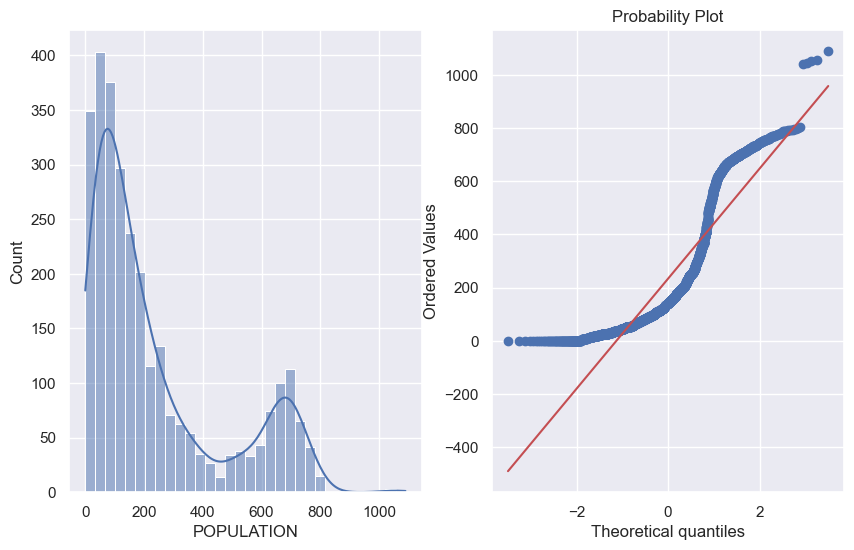

THINNESS_5_to_19_YEARS
SKEW BEFORE CUBE ROOT TRANSFORMATION: 1.6877112244369756
SKEW AFTER TRANSFORMATION: 0.21425917308113904


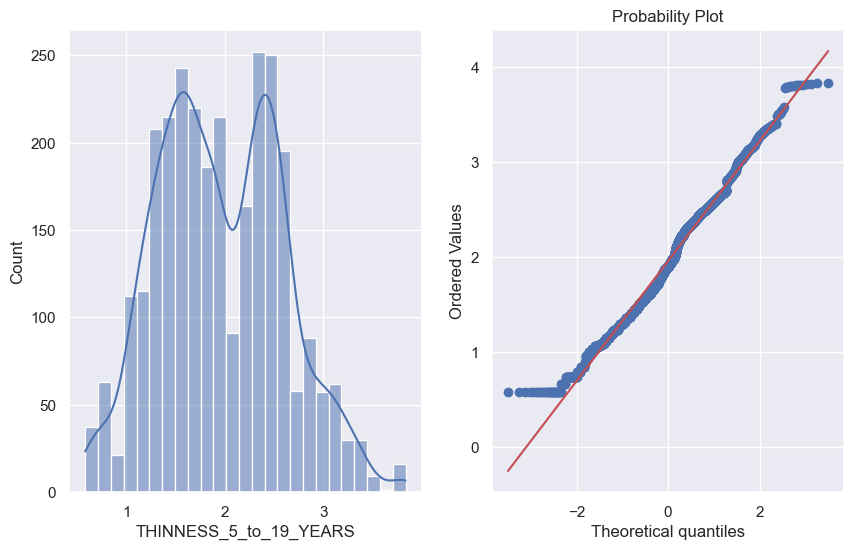

In [17]:
#cube root
for var in right_skew:
    print(var)
    print("SKEW BEFORE CUBE ROOT TRANSFORMATION:",life_transform[var].skew())
    temp_df=pd.DataFrame(np.power(life_transform[var],(1/3)))
    plot_skew(temp_df,var)

### YeoJohnson

ADULT_MORTALITY
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 1.1637489741549902
SKEW AFTER TRANSFORMATION: -0.05935907440154705


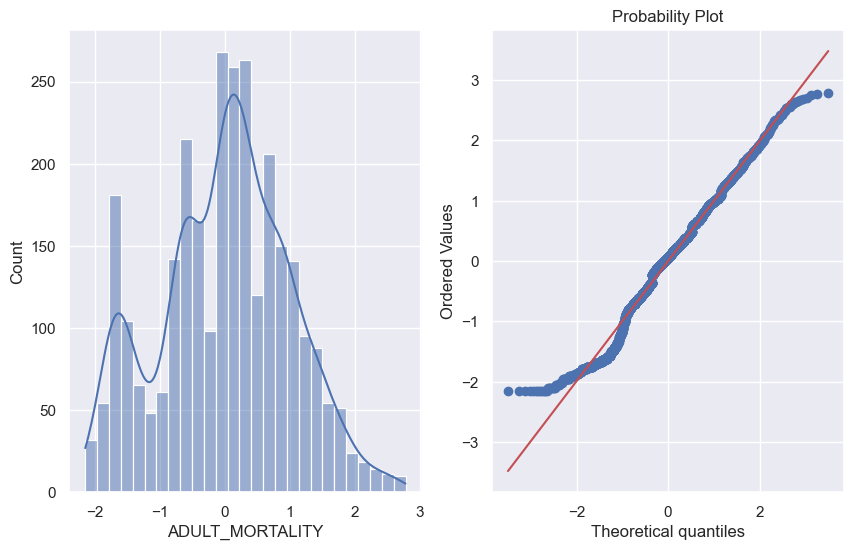

INFANT_DEATHS
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 2.5565232509355993
SKEW AFTER TRANSFORMATION: 0.17486630299220596


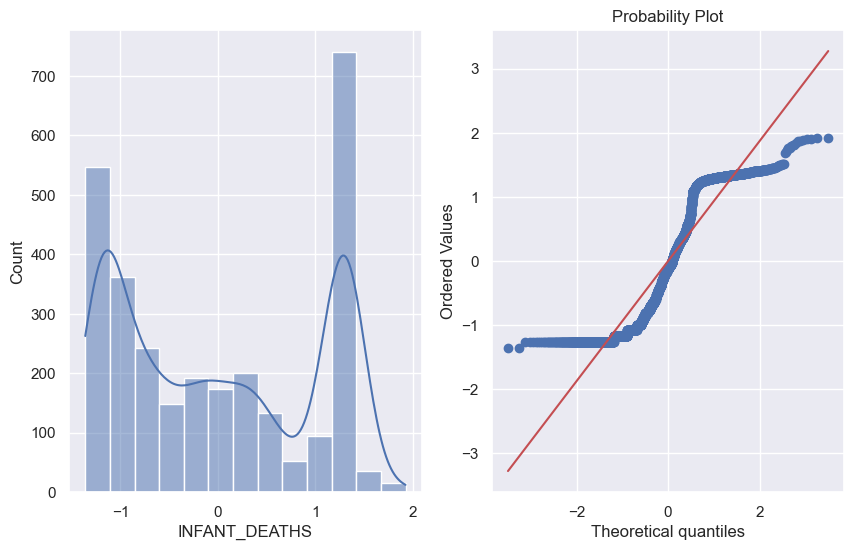

ALCOHOL
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 1.9608855687480065
SKEW AFTER TRANSFORMATION: -0.014946911440587128


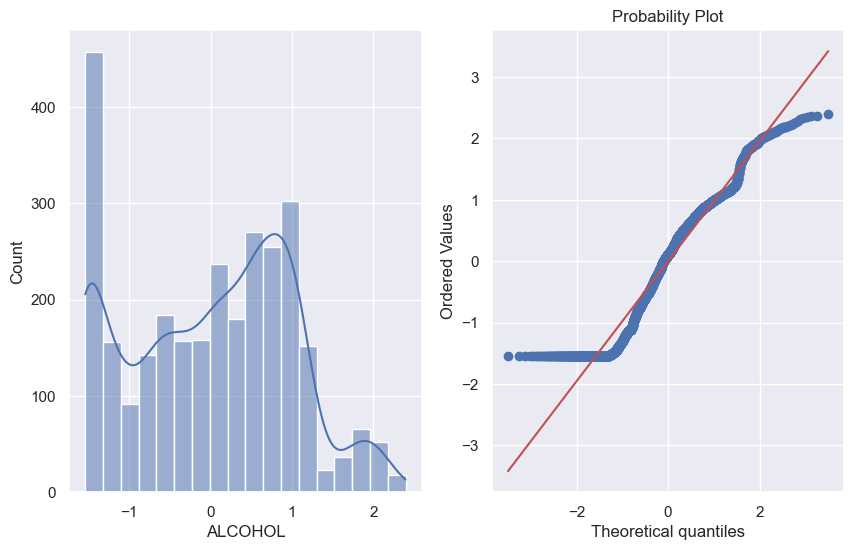

PERCENTAGE_EXPENDITURE
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 1.6032576952363025
SKEW AFTER TRANSFORMATION: -0.004425095614858906


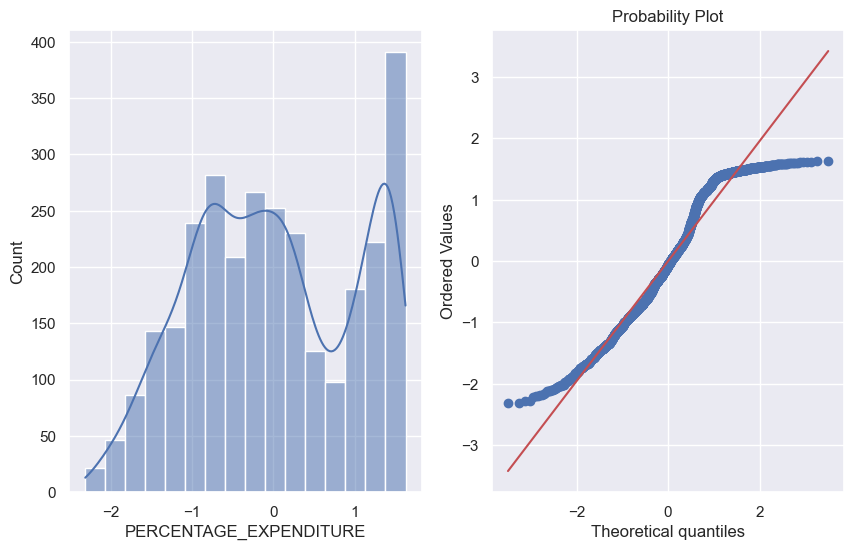

MEASLES
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 9.441331947061583
SKEW AFTER TRANSFORMATION: 0.3891919103376974


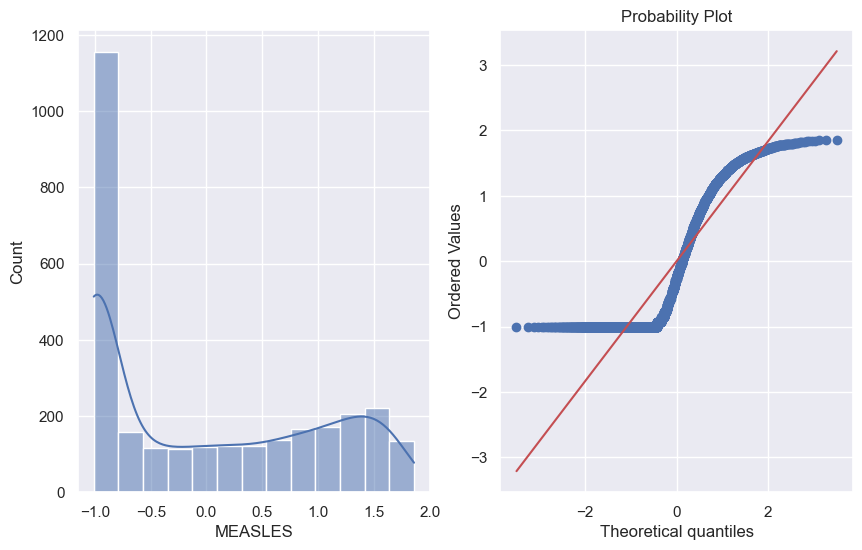

UNDER_FIVE_DEATHS
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 2.647119700035849
SKEW AFTER TRANSFORMATION: 0.16444046713489915


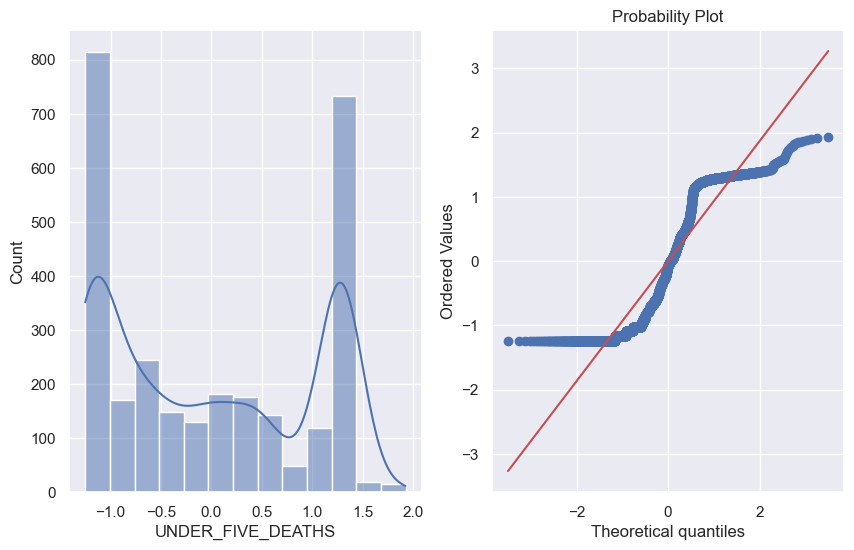

TOTAL_EXPENDITURE
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 2.0484470605631637
SKEW AFTER TRANSFORMATION: -0.013559077140645663


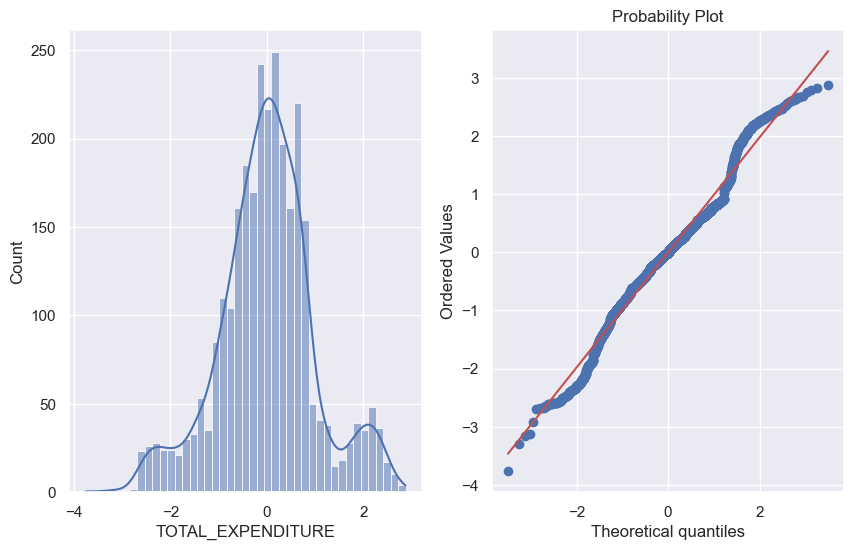

HIV/AIDS
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 5.396112042126371
SKEW AFTER TRANSFORMATION: 1.246244802312208


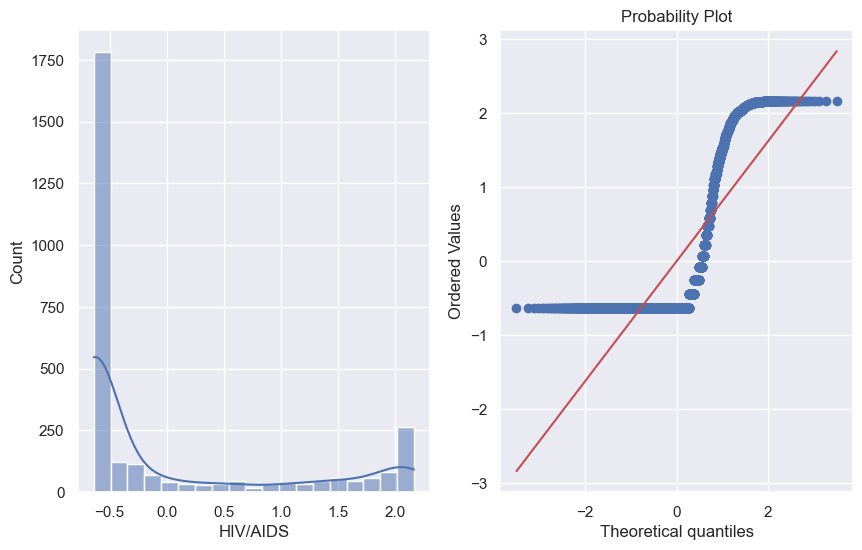

GDP
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 1.712521787860184
SKEW AFTER TRANSFORMATION: -0.005736827777010361


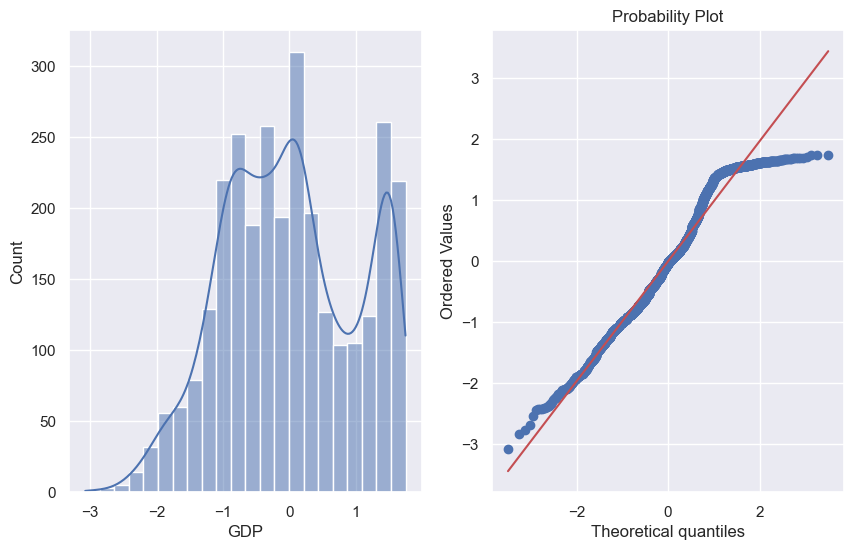

POPULATION
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 2.6944672607438744
SKEW AFTER TRANSFORMATION: -0.03700501351770001


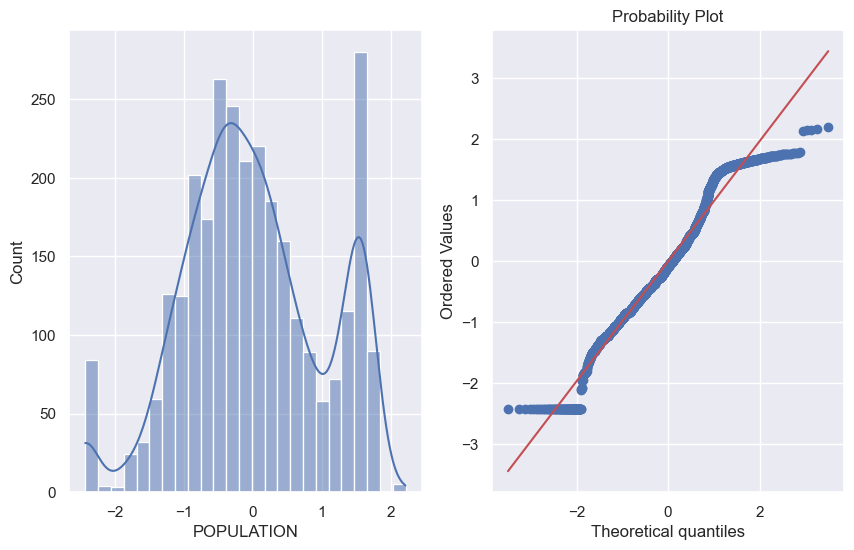

THINNESS_5_to_19_YEARS
SKEW BEFORE YEOJOHNSON TRANSFORMATION: 1.6877112244369756
SKEW AFTER TRANSFORMATION: -0.012038333948803586


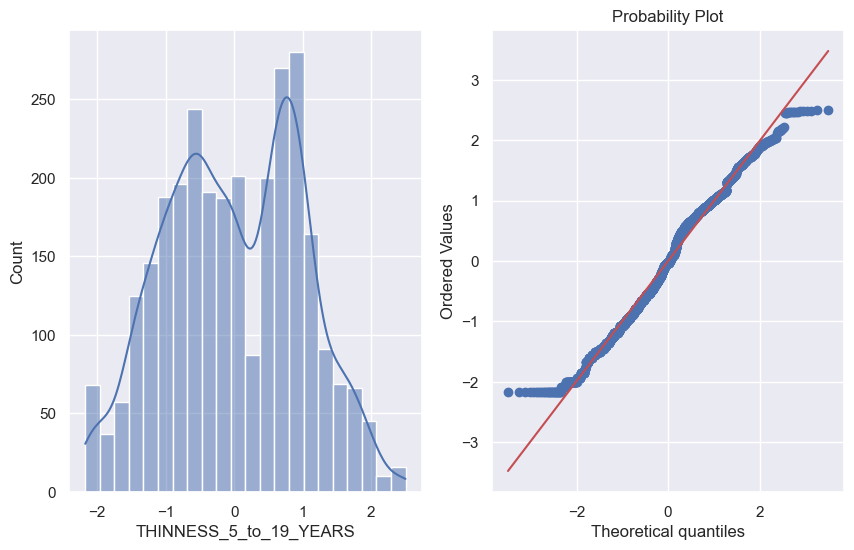

In [18]:
#yeojohnson
for var in right_skew:
    transformer=PowerTransformer(method='yeo-johnson')
    print(var)
    print("SKEW BEFORE YEOJOHNSON TRANSFORMATION:",life_transform[var].skew())
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    plot_skew(temp_df,var)

### Quantile

ADULT_MORTALITY
SKEW BEFORE QUANTILE TRANSFORMATION: 1.1637489741549902
SKEW AFTER TRANSFORMATION: -0.04605986074236952


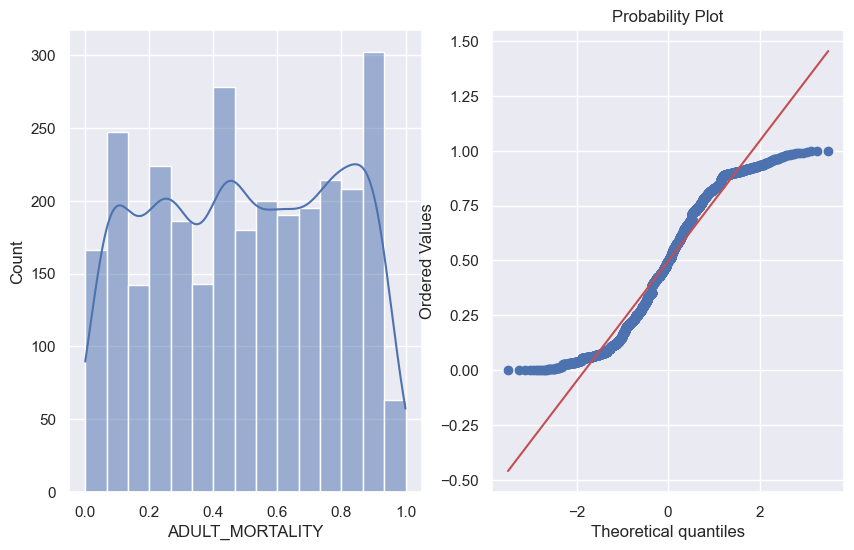

INFANT_DEATHS
SKEW BEFORE QUANTILE TRANSFORMATION: 2.5565232509355993
SKEW AFTER TRANSFORMATION: 0.06136910864466429


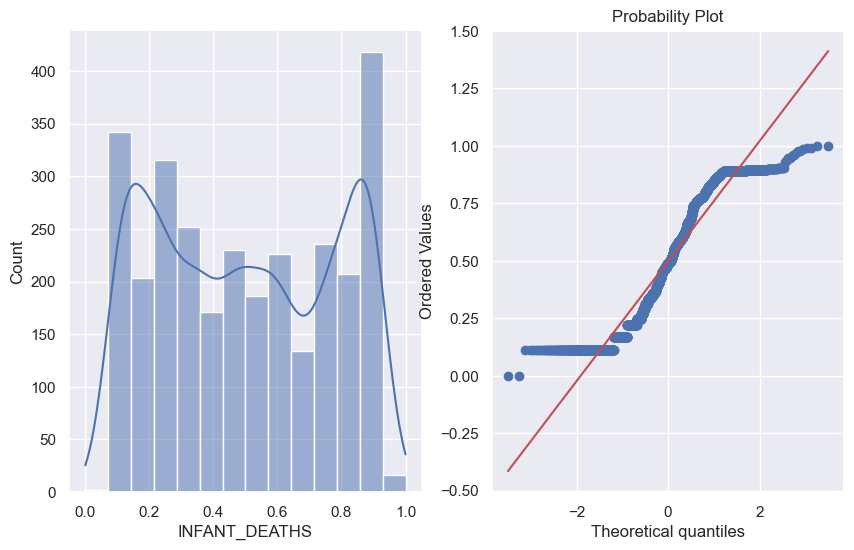

ALCOHOL
SKEW BEFORE QUANTILE TRANSFORMATION: 1.9608855687480065
SKEW AFTER TRANSFORMATION: -0.11212256167172141


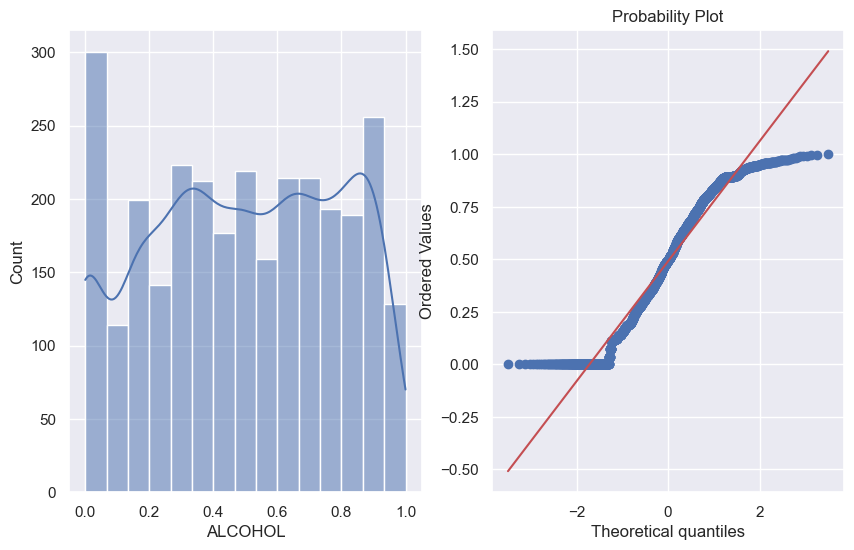

PERCENTAGE_EXPENDITURE
SKEW BEFORE QUANTILE TRANSFORMATION: 1.6032576952363025
SKEW AFTER TRANSFORMATION: -0.012046461631430914


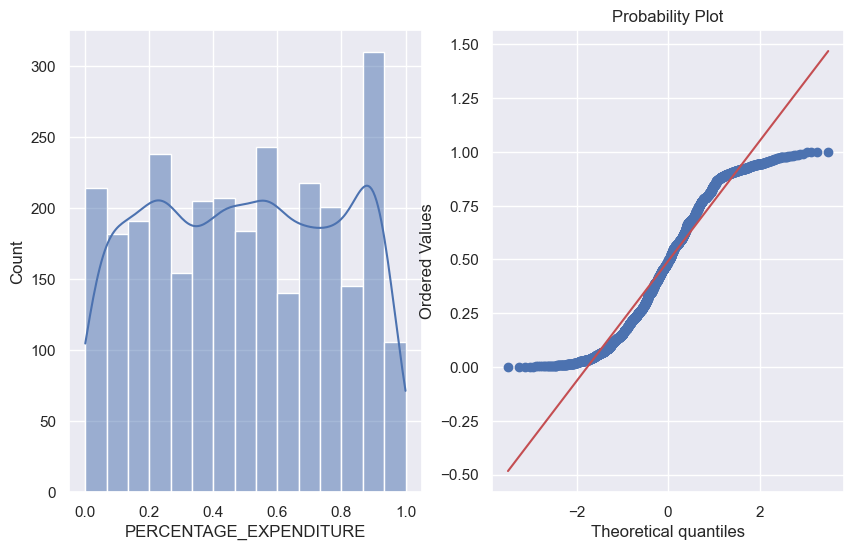

MEASLES
SKEW BEFORE QUANTILE TRANSFORMATION: 9.441331947061583
SKEW AFTER TRANSFORMATION: -0.15637212295392594


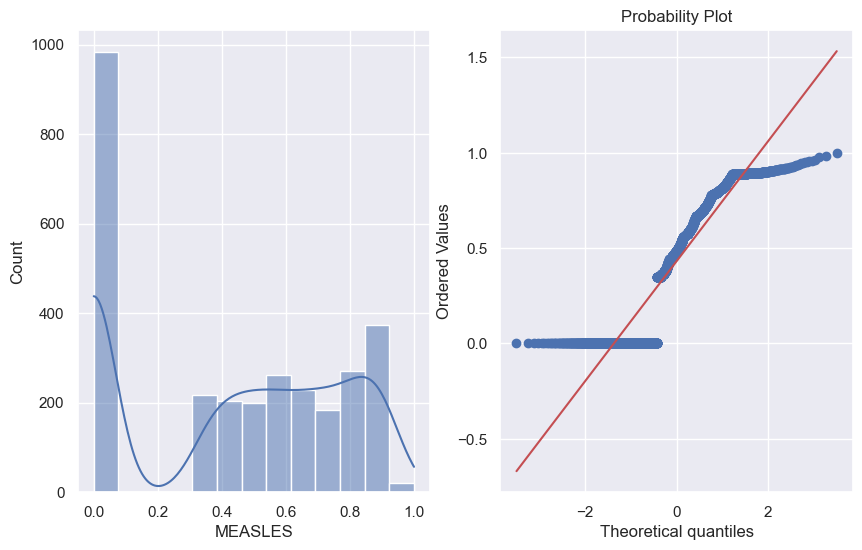

UNDER_FIVE_DEATHS
SKEW BEFORE QUANTILE TRANSFORMATION: 2.647119700035849
SKEW AFTER TRANSFORMATION: -0.14396141801529064


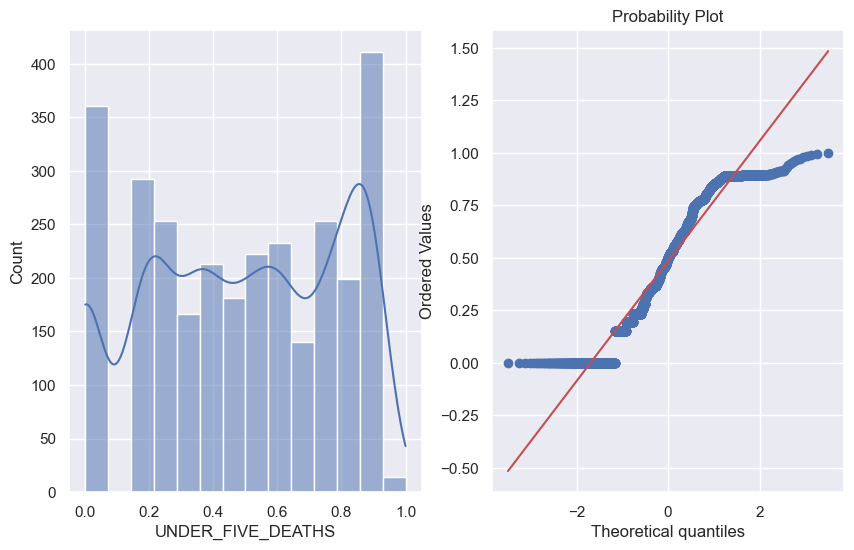

TOTAL_EXPENDITURE
SKEW BEFORE QUANTILE TRANSFORMATION: 2.0484470605631637
SKEW AFTER TRANSFORMATION: -0.01599564446341748


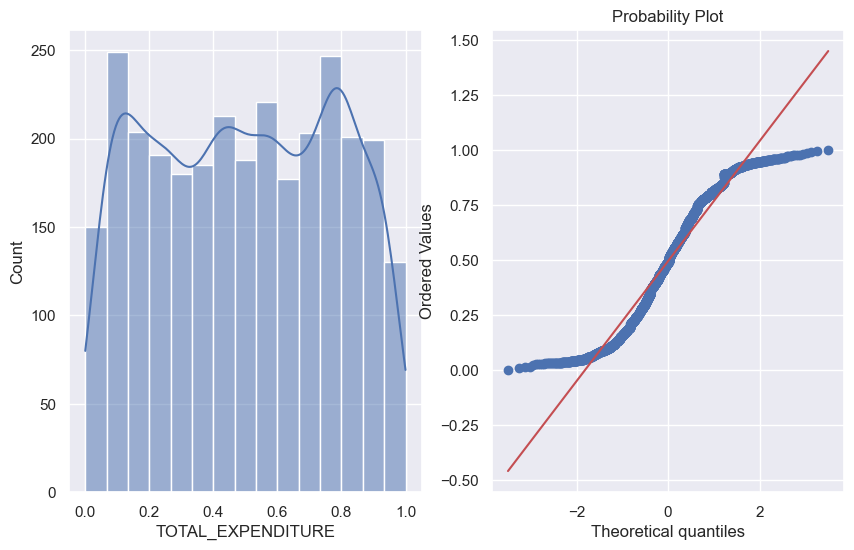

HIV/AIDS
SKEW BEFORE QUANTILE TRANSFORMATION: 5.396112042126371
SKEW AFTER TRANSFORMATION: 0.521300324857706


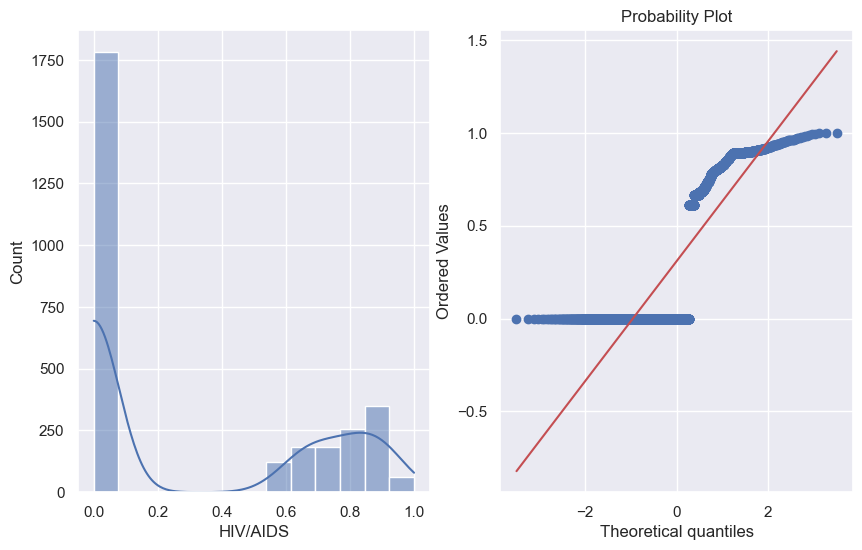

GDP
SKEW BEFORE QUANTILE TRANSFORMATION: 1.712521787860184
SKEW AFTER TRANSFORMATION: -0.02077856834918995


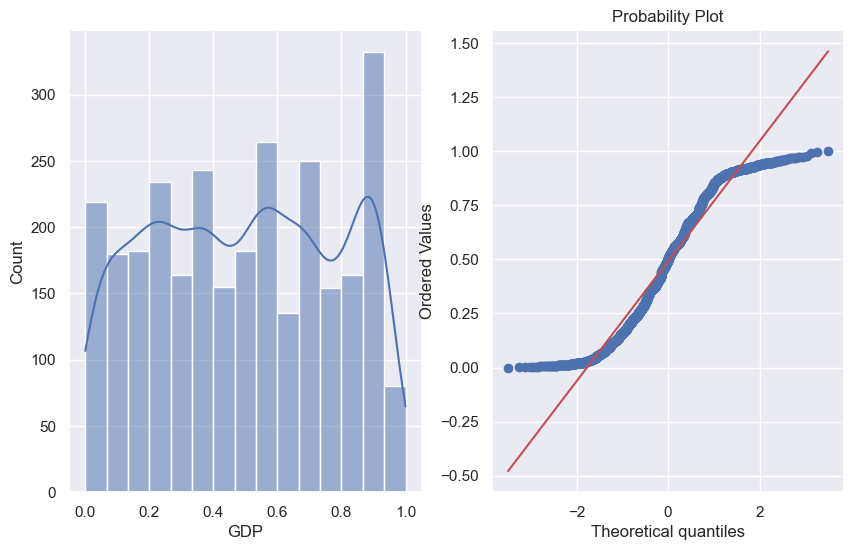

POPULATION
SKEW BEFORE QUANTILE TRANSFORMATION: 2.6944672607438744
SKEW AFTER TRANSFORMATION: -0.075432754283426


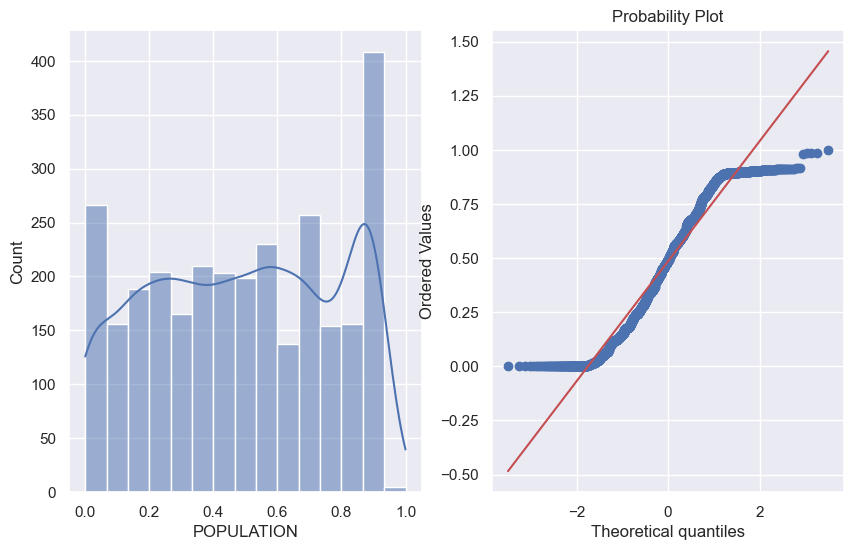

THINNESS_5_to_19_YEARS
SKEW BEFORE QUANTILE TRANSFORMATION: 1.6877112244369756
SKEW AFTER TRANSFORMATION: -0.046658893455423046


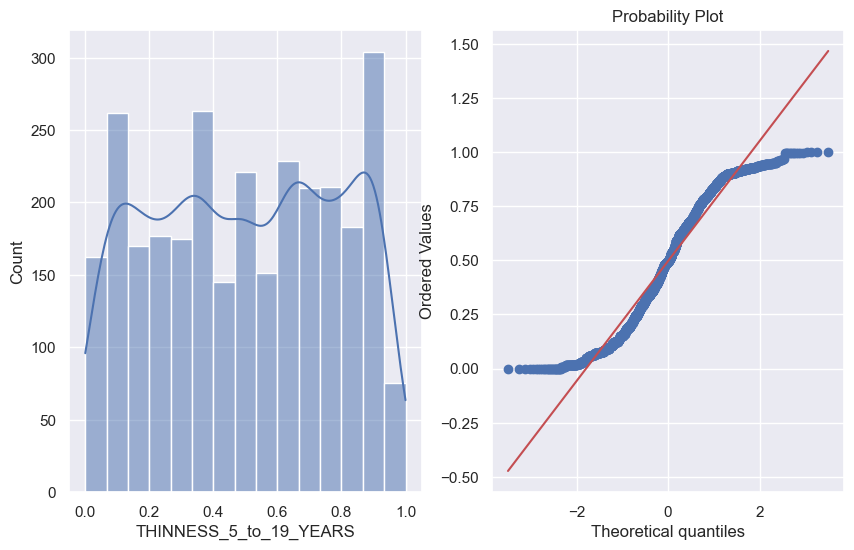

In [19]:
#quantile
for var in right_skew:
    transformer=QuantileTransformer(n_quantiles=10, random_state=0)
    print(var)
    print("SKEW BEFORE QUANTILE TRANSFORMATION:",life_transform[var].skew())
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    plot_skew(temp_df,var)

So far, it seems like yeojohnson transformation and quantile transformations produced the lowest skew, post transformation for most of the features including `HIV/AIDS`.
We will make a function find out the best transformation for each feature based on the skew post correction.

## Right skew results

In [20]:
for var in right_skew:
    transformer=PowerTransformer(method='yeo-johnson')
    transformer2=QuantileTransformer(n_quantiles=10, random_state=0)
    max=abs(life_transform[var].skew())
    best='None'
    
    #logarithmic
    temp_df=pd.DataFrame(np.log1p(life_transform[var]))
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='Logarithmic'
    
    #reciprocal
    temp_df=pd.DataFrame(1/life_transform[var])
    temp_df.columns=[var]
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='Reciprocal'
        
    #square root
    temp_df=pd.DataFrame(np.power(life_transform[var],(1/2)))
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='Sqaure root'
        
    #cube root
    temp_df=pd.DataFrame(np.power(life_transform[var],(1/3)))
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='Cube root'
    
    #yeojohnson
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='yeojohnson'
        
    #quantile
    temp_array=transformer2.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    temp_df=pd.DataFrame(temp_array)
    temp_df.columns=[var]
    if abs(temp_df[var].skew()) < max:
        max= abs(temp_df[var].skew())
        best='quantile'
    
    #result
    print("The best transformation for",var,"is",best,'----->',max.round(4))
    

The best transformation for ADULT_MORTALITY is quantile -----> 0.0461
The best transformation for INFANT_DEATHS is quantile -----> 0.0614
The best transformation for ALCOHOL is yeojohnson -----> 0.0149
The best transformation for PERCENTAGE_EXPENDITURE is yeojohnson -----> 0.0044
The best transformation for MEASLES is quantile -----> 0.1564
The best transformation for UNDER_FIVE_DEATHS is quantile -----> 0.144
The best transformation for TOTAL_EXPENDITURE is yeojohnson -----> 0.0136
The best transformation for HIV/AIDS is quantile -----> 0.5213
The best transformation for GDP is yeojohnson -----> 0.0057
The best transformation for POPULATION is yeojohnson -----> 0.037
The best transformation for THINNESS_5_to_19_YEARS is yeojohnson -----> 0.012


*the skew for `HIV/AIDS` is slightly above 0.5*

## Final Results

 0.   COUNTRY<br>
 1.   STATUS<br>
 2.   YEAR<br>
 3.   LIFE_EXPECTANCY -->  **quantile transformation**<br>
 4.   ADULT_MORTALITY-->  **quantile transformation**<br>
 5.   INFANT_DEATHS  -->  **quantile transformation**<br>
 6.   ALCOHOL            -->    **yeo-johnson transformation**<br>
 7.   PERCENTAGE_EXPENDITURE  -->    **yeo-johnson transformation**<br>
 8.   HEPATITIS_B    -->        **quantile transformation**<br>
 9.   MEASLES    -->       **quantile transformation**<br>
 10.  BMI<br>
 11.  UNDER_FIVE_DEATHS --> **quantile transformation**<br>
 12.  POLIO          -->           **quantile transformation**<br>
 13.  TOTAL_EXPENDITURE-->  **yeo-johnson transformation** <br>
 14.  DIPHTHERIA  -->              **quantile transformation**<br>
 15.  HIV/AIDS    -->         **quantile transformation**<br>
 16.  GDP --> **yeo-johnson transformation**             <br>
 17.  POPULATION --> **yeo-johnson transformation**<br>
 18.  THINNESS_5_to_19_YEARS --> **yeo-johnson transformation**<br>
 19.  INCOME_COMPOSITION_OF_RESOURCES -->  **quantile transformation**<br>
 20. SCHOOLING      <br>

## Perform quantile transformation

In [21]:
quantile=['LIFE_EXPECTANCY','ADULT_MORTALITY','INFANT_DEATHS','HEPATITIS_B','MEASLES','UNDER_FIVE_DEATHS','POLIO','DIPHTHERIA','HIV/AIDS','INCOME_COMPOSITION_OF_RESOURCES']
transformer=QuantileTransformer(n_quantiles=10, random_state=0)

for var in quantile:
    temp_array=transformer2.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    life_transform[var]=pd.DataFrame(temp_array)

## Perform yeo-johnson transformation

In [22]:
johnson=['ALCOHOL','PERCENTAGE_EXPENDITURE','TOTAL_EXPENDITURE','GDP','POPULATION','THINNESS_5_to_19_YEARS']
transformer=PowerTransformer(method='yeo-johnson')

for var in johnson:
    temp_array=transformer.fit_transform(np.array(life_transform[var]).reshape(-1,1))
    life_transform[var]=pd.DataFrame(temp_array)

In [23]:
life_transform

COUNTRY      STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0     Afghanistan  Developing  2015.0         0.294686         0.802268   
1     Afghanistan  Developing  2014.0         0.187396         0.813152   
2     Afghanistan  Developing  2013.0         0.187396         0.809070   
3     Afghanistan  Developing  2012.0         0.180763         0.814512   
4     Afghanistan  Developing  2011.0         0.175788         0.818594   
...           ...         ...     ...              ...              ...   
2933     Zimbabwe  Developing  2004.0         0.046784         1.000000   
2934     Zimbabwe  Developing  2003.0         0.047953         0.997757   
2935     Zimbabwe  Developing  2002.0         0.049708         0.248889   
2936     Zimbabwe  Developing  2001.0         0.052632         0.989627   
2937     Zimbabwe  Developing  2000.0         0.056725         0.983740   

      INFANT_DEATHS   ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B   MEASLES  \
0          0.606280 -1.540089               -0.653537     0.317298  0.806913   
1          0.611111 -1.540089               -0.641558     0.293245  0.766886   
2          0.615942 -1.540089               -0.643161     0.309280  0.749863   
3          0.623188 -1.540089               -0.617785     0.333333  0.883365   
4          0.628019 -1.540089               -1.506529     0.340278  0.888946   
...             ...       ...                     ...          ...       ...   
2933       0.484848  0.149101                1.081648     0.340278  0.547009   
2934       0.479798  0.088457                1.061102     0.018072  0.799610   
2935       0.474747  0.162786               -2.312958     0.375000  0.715266   
2936       0.474747 -0.554276               -2.312958     0.395833  0.777046   
2937       0.469697 -0.569376                0.536294     0.416667  0.822316   

      ...  UNDER_FIVE_DEATHS     POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  \
0     ...           0.616162  0.006410           0.562634    0.171717   
1     ...           0.621212  0.127778           0.567017    0.156566   
2     ...           0.626263  0.150000           0.556038    0.166667   
3     ...           0.632997  0.177778           0.639925    0.181818   
4     ...           0.639731  0.183333           0.497836    0.186869   
...   ...                ...       ...                ...         ...   
2933  ...           0.534188  0.177778           0.321024    0.171717   
2934  ...           0.529915  0.008547           0.161034    0.186869   
2935  ...           0.525641  0.211111           0.163773    0.202020   
2936  ...           0.521368  0.233333           0.059581    0.222222   
2937  ...           0.521368  0.255556           0.313477    0.255556   

      HIV/AIDS       GDP  POPULATION  THINNESS_5_to_19_YEARS  \
0     0.000000 -0.765913    0.695802                1.863475   
1     0.000000 -0.745047   -0.642920                1.881842   
2     0.000000 -0.731598    0.674292                1.896363   
3     0.000000 -0.705787   -0.011252                1.914304   
4     0.000000 -1.725140   -0.073218                1.932018   
...        ...       ...         ...                     ...   
2933  0.959553 -0.876123    0.368261                1.109933   
2934  0.966928 -0.877103    0.364611                1.166410   
2935  0.974304 -1.768514   -0.857872               -0.981848   
2936  0.979776 -0.793556    0.357704               -0.744249   
2937  0.983107 -0.794540    0.353934                1.311940   

      INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  
0                            0.215278       10.1  
1                            0.211111       10.0  
2                            0.202778        9.9  
3                            0.193056        9.8  
4                            0.180556        9.5  
...                               ...        ...  
2933                         0.115278        9.2  
2934                         0.130556        9.5  
2935                         0.143056      

In [24]:
life_transform.skew()

C:\Users\TdrDi\AppData\Local\Temp\ipykernel_16876\4137404530.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_transform.skew()


YEAR                              -0.006409
LIFE_EXPECTANCY                   -0.017179
ADULT_MORTALITY                   -0.046060
INFANT_DEATHS                      0.061369
ALCOHOL                           -0.014947
PERCENTAGE_EXPENDITURE            -0.004425
HEPATITIS_B                        0.048673
MEASLES                           -0.156372
BMI                               -0.128950
UNDER_FIVE_DEATHS                 -0.143961
POLIO                              0.089377
TOTAL_EXPENDITURE                 -0.013559
DIPHTHERIA                         0.104061
HIV/AIDS                           0.521300
GDP                               -0.005737
POPULATION                        -0.037005
THINNESS_5_to_19_YEARS            -0.012038
INCOME_COMPOSITION_OF_RESOURCES   -0.035629
SCHOOLING                         -0.207967
dtype: float64

## Encode `STATUS` into numeric 

In [25]:
label_encode = LabelEncoder()
labels_status = label_encode.fit_transform(life_transform['STATUS'])
life_transform['STATUS']=labels_status

In [26]:
life_transform['STATUS'].nunique()

2

In [27]:
life_transform

COUNTRY  STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0     Afghanistan       1  2015.0         0.294686         0.802268   
1     Afghanistan       1  2014.0         0.187396         0.813152   
2     Afghanistan       1  2013.0         0.187396         0.809070   
3     Afghanistan       1  2012.0         0.180763         0.814512   
4     Afghanistan       1  2011.0         0.175788         0.818594   
...           ...     ...     ...              ...              ...   
2933     Zimbabwe       1  2004.0         0.046784         1.000000   
2934     Zimbabwe       1  2003.0         0.047953         0.997757   
2935     Zimbabwe       1  2002.0         0.049708         0.248889   
2936     Zimbabwe       1  2001.0         0.052632         0.989627   
2937     Zimbabwe       1  2000.0         0.056725         0.983740   

      INFANT_DEATHS   ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B   MEASLES  \
0          0.606280 -1.540089               -0.653537     0.317298  0.806913   
1          0.611111 -1.540089               -0.641558     0.293245  0.766886   
2          0.615942 -1.540089               -0.643161     0.309280  0.749863   
3          0.623188 -1.540089               -0.617785     0.333333  0.883365   
4          0.628019 -1.540089               -1.506529     0.340278  0.888946   
...             ...       ...                     ...          ...       ...   
2933       0.484848  0.149101                1.081648     0.340278  0.547009   
2934       0.479798  0.088457                1.061102     0.018072  0.799610   
2935       0.474747  0.162786               -2.312958     0.375000  0.715266   
2936       0.474747 -0.554276               -2.312958     0.395833  0.777046   
2937       0.469697 -0.569376                0.536294     0.416667  0.822316   

      ...  UNDER_FIVE_DEATHS     POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  \
0     ...           0.616162  0.006410           0.562634    0.171717   
1     ...           0.621212  0.127778           0.567017    0.156566   
2     ...           0.626263  0.150000           0.556038    0.166667   
3     ...           0.632997  0.177778           0.639925    0.181818   
4     ...           0.639731  0.183333           0.497836    0.186869   
...   ...                ...       ...                ...         ...   
2933  ...           0.534188  0.177778           0.321024    0.171717   
2934  ...           0.529915  0.008547           0.161034    0.186869   
2935  ...           0.525641  0.211111           0.163773    0.202020   
2936  ...           0.521368  0.233333           0.059581    0.222222   
2937  ...           0.521368  0.255556           0.313477    0.255556   

      HIV/AIDS       GDP  POPULATION  THINNESS_5_to_19_YEARS  \
0     0.000000 -0.765913    0.695802                1.863475   
1     0.000000 -0.745047   -0.642920                1.881842   
2     0.000000 -0.731598    0.674292                1.896363   
3     0.000000 -0.705787   -0.011252                1.914304   
4     0.000000 -1.725140   -0.073218                1.932018   
...        ...       ...         ...                     ...   
2933  0.959553 -0.876123    0.368261                1.109933   
2934  0.966928 -0.877103    0.364611                1.166410   
2935  0.974304 -1.768514   -0.857872               -0.981848   
2936  0.979776 -0.793556    0.357704               -0.744249   
2937  0.983107 -0.794540    0.353934                1.311940   

      INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  
0                            0.215278       10.1  
1                            0.211111       10.0  
2                            0.202778        9.9  
3                            0.193056        9.8  
4                            0.180556        9.5  
...                               ...        ...  
2933                         0.115278        9.2  
2934                         0.130556        9.5  
2935                         0.143056       10.0  
2936                         0.143056   

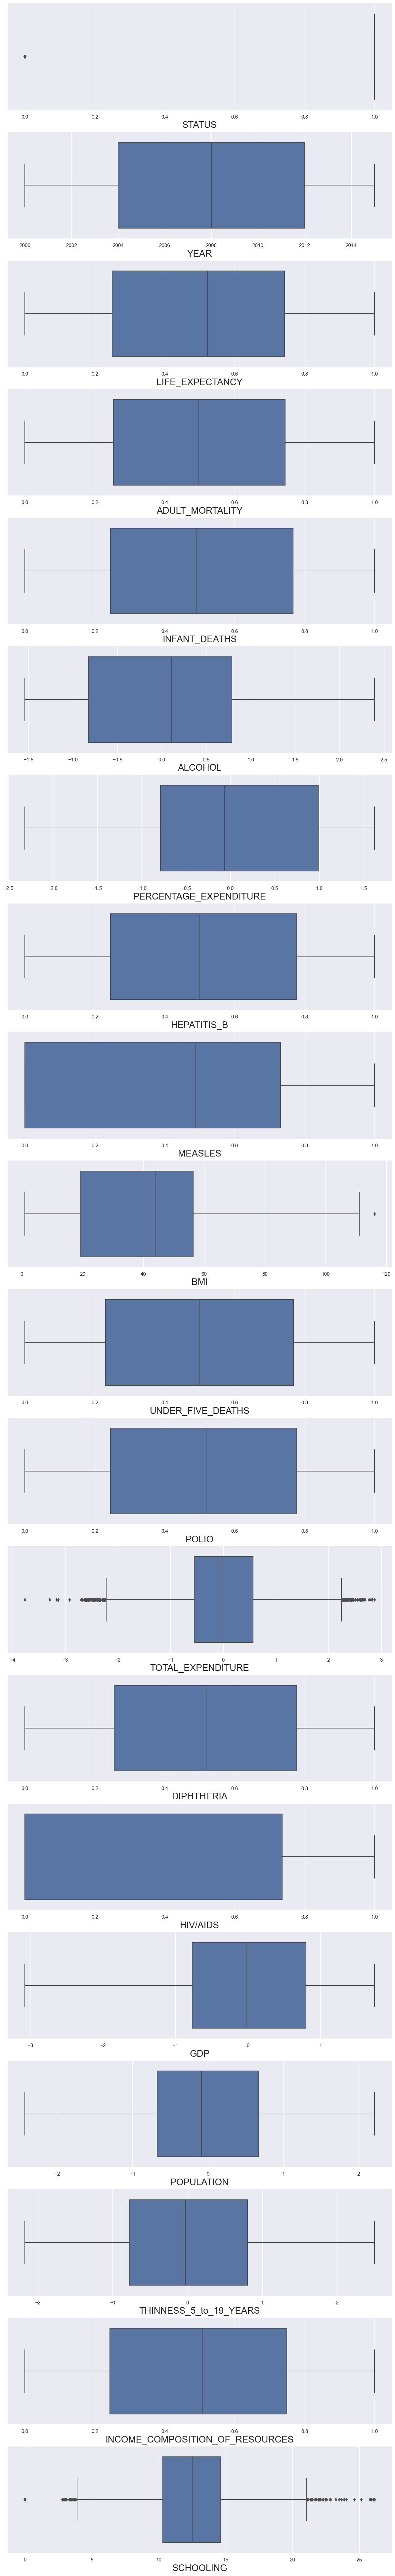

In [29]:
f,axes=plt.subplots(20,1,figsize=(15,100))
count=0
for var in life_transform.select_dtypes(exclude='object'):
    sb.boxplot(data=life_transform,orient='h',x=var,ax=axes[count])
    axes[count].set_xlabel(var,fontsize=20)
    count+=1
plt.show()

There are still outliers in `SCHOOLING` and `TOTAL_EXPENDITURE` however we believe they are caused by natural variation and are normal part of the data distribution. They accurately reflect the vast differences in **years of education** and **healthcare budget** across different countries in our world today. Thus removing them would take away from the natural statistical variation in these kinds of data that paint a real picture to how our world works today. So we will not remove these outliers.

In [ ]:
life_transform.to_csv("dataset/life_transform.csv")